# Os Gigantes da Steam: Análise dos 1000 Jogos Mais Bem Avaliados

# Integrantes: 
Caio Vitor Melo de Santana

Rougger Xavier Guerra Neto

Gabriel Negreiros Saraiva

Rodolfo França Souza


## Perguntas da Análise ❓
* Quais são os gêneros de jogos que tem as melhores classificações médias? 
* Quais são as plataformas com mais jogos entre os mil mais bem avaliados da Steam? 
* Há alguma relação entre os jogos mais populares serem os mais bem avaliados? 


# Introdução - Analise de Dados Steam - v2.0 Reboot
Optamos por refazer nosso projeto do zero, pois já havia outro grupo trabalhando com o mesmo DataFrame, e também porque o grupo, coletivamente, não gostou muito das possibilidades de análise oferecidas pelo CSV que iríamos utilizar. Nesse sentido, buscamos dados que consideramos mais interessantes para realizar análises, ainda sobre o mesmo tema – jogos da Steam. A escolha do tema foi devido ao interesse comum dos integrantes do grupo por videogames, dessarte pareceu natural a escolha. Mas muito pode ser falado sobre videogames então teve que ser decidido um recorte, para isso procuramos, invés de vendas, usar como recorte os mil jogos mais bem avaliados da Steam. Esses dados foram relativamente fáceis de encontrar, já que a Steam os divulga publicamente, ao contrário dos dados de venda, que são mantidos em segredo pelas empresas que produzem os jogos. Já dados de avaliação são disponibilizados ao público pela Steam, e existem organizações como a SteamDB que compila esses dados através da API oficial da Steam. 

# Sumário:
- Pré-Análise
    - 0.1 Recolhendo dados: Da raspagem à limpeza.
        - 0.1.1 Webscraping do SteamDB 
        - 0.1.2 Requisitando a API do Internet Game Database 
        - 0.1.3 Limpeza do Dataset 
- Perguntas
- Análises
    - Parte 1
        - 1.1 Médias
            - 1.1.1 Médias do SteamDB
            - 1.1.2 Médias do Internet Game Database
        - 1.2 Medianas
            - 1.2.1 Mediana das informações do SteamDB
            - 1.2.2 Mediana das informações do Internet Game Database
        - 1.3 Modas/Agrupamentos
            - 1.3.1 Modo de jogo com mais avaliações positivas e negativas
            - 1.3.2 Plataforma com mais avaliações positivas e negativas
            - 1.3.3 Game engine com mais avaliações positivas e negativas 
            - 1.3.4 Perspectiva do jogador com mais avaliações positivas e negativas 
            - 1.3.5 Top 10 Gêneros de jogos com mais avaliações positivas e negativas
                - 1.3.5.a Listagem de gêneros dos jogos
                - 1.3.5.b Generos que apresentam o maior numero de reviews positivas e negativas na Steam 
    - Parte 2: Medidas de Dispersão
        - 2.1 Boxplot
            - 2.1.1 Boxplot das reviews negativas
            - 2.1.2 Boxplot das reviews positivas
        - 2.2 Desvio Padrão
            - 2.2.1 Desvio padrão de reviews (Positivas/Negativas)
                - 2.2.1.a Sobre as avaliações positivas
                - 2.2.1.b Sobre as avaliações negativas
            - 2.2.2 Desvio padrão do total de avaliações
                - 2.2.2.a Encontrando os outliers através do z-score do desvio padrão.
    - Parte 3: Gráficos
        - 3.1 Plataformas
            - 3.1.1 As dez plataformas que mais lançaram jogos entre 1992 e 2004. (Histograma Vertical)
            - 3.1.2 As dez plataformas que mais lançaram jogos por ano (Grafico de Linhas) 
        - 3.2 Correlação Avaliativa
            - 3.2.1 Uma boa avaliação do jogo na Steam se relaciona com o total de reviews?
            - 3.2.2 Representação grafica da correlação entre razão positiva de reviews e o total (Matriz de Correlação)
                - 3.2.2.a Adereçando dados outliers para melhorar visualização do gráfico 
        - 3.3 Gêneros
            - 3.3.1 Gêneros de jogos com maior sucesso entre o público (Histograma Horizontal)
            - 3.3.2 Gênero de Jogos com Maior Sucesso entre a Crítica 
            - 3.3.3 Gêneros de Jogos: Crítica vs. Público (Tabela Comparativa)
                - 3.3.3.a Tabela da variação de posições dos gêneros de jogos entre público e crítica 
        - 3.4 Score
    - Parte 4: K-Means
    - Parte 5: Conclusão

---


## Parte 0: Pré-Análise
- 0.1 Recolhendo dados: Da raspagem à limpeza.
    - 0.1.1 Webscraping do SteamDB 
    - 0.1.2 Requisitando a API do Internet Game Database 
    - 0.1.3 Limpeza do Dataset 

# Recolhendo Dados: Da raspagem à limpeza de Dataset (0.1)

## Fonte de Dados: SteamDB (0.1.1)
Pudemos observar através do SteamDB esses mil jogos mais bem avaliados em relação à proporção de avaliações positivas e negativas deixadas pela comunidade da Steam. No entanto, não havia no Kaggle ou em sites similares um CSV com essas informações. Pesquisando um pouco, e com os ensinamentos da aula de Introdução a Computação, observamos que era possivel obter esses dados através de Webscraping, e assim o fizemos: utilizando a biblioteca BeautifulSoup4 foi possível extrair os dados facilmente do site (código disponível em ./Extras/webscraping/raspagem_steamdb_bs4) o site requeria login para acessar a visualização sem restrição dos mil jogos. Com uma rápida sacada foi fácil burlar esse requerimento, a solução era simples: baixar a a página da Web enquanto logado através do usuário da Steam no SteamDB... e funcionou! Como as informações estavam diretamente escritas no código fonte da página, não apresentou nenhum problema maior. Foi apenas criar um laço e indicar as tags seletoras do CSS responsáveis por cada dado específico, enquanto escrevia num arquivo json o rank, nome do jogo, avaliações positivas/negativas, total de reviews e a porcentagem da avaliação.

###### Raspagem do Steamdb realizada dia 08 de outubro de 2024.

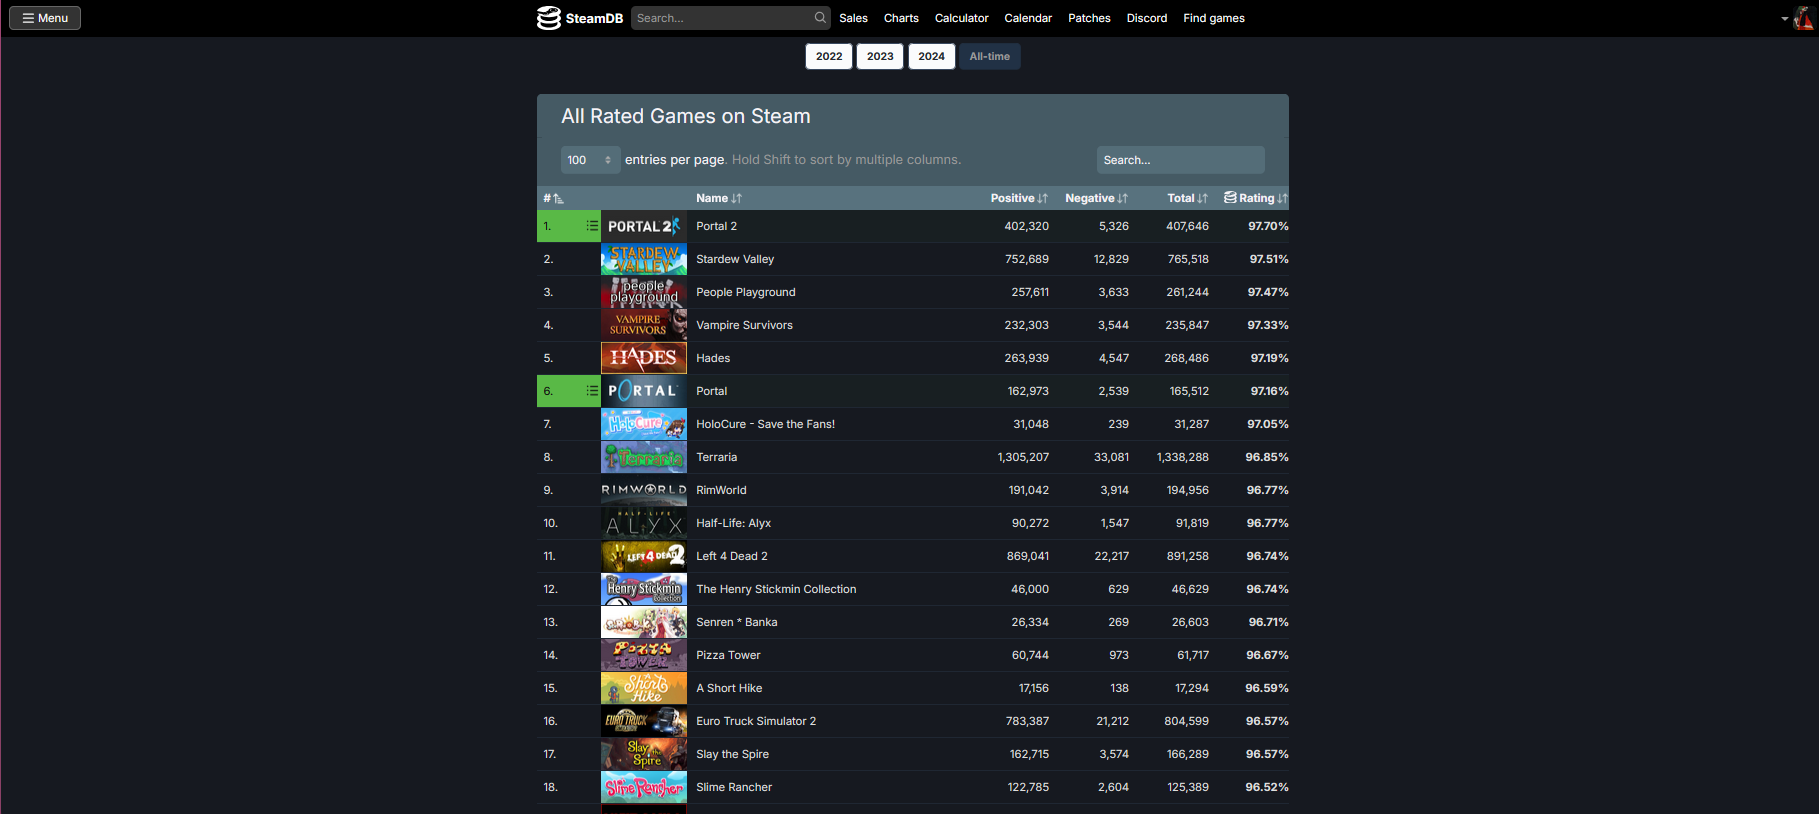

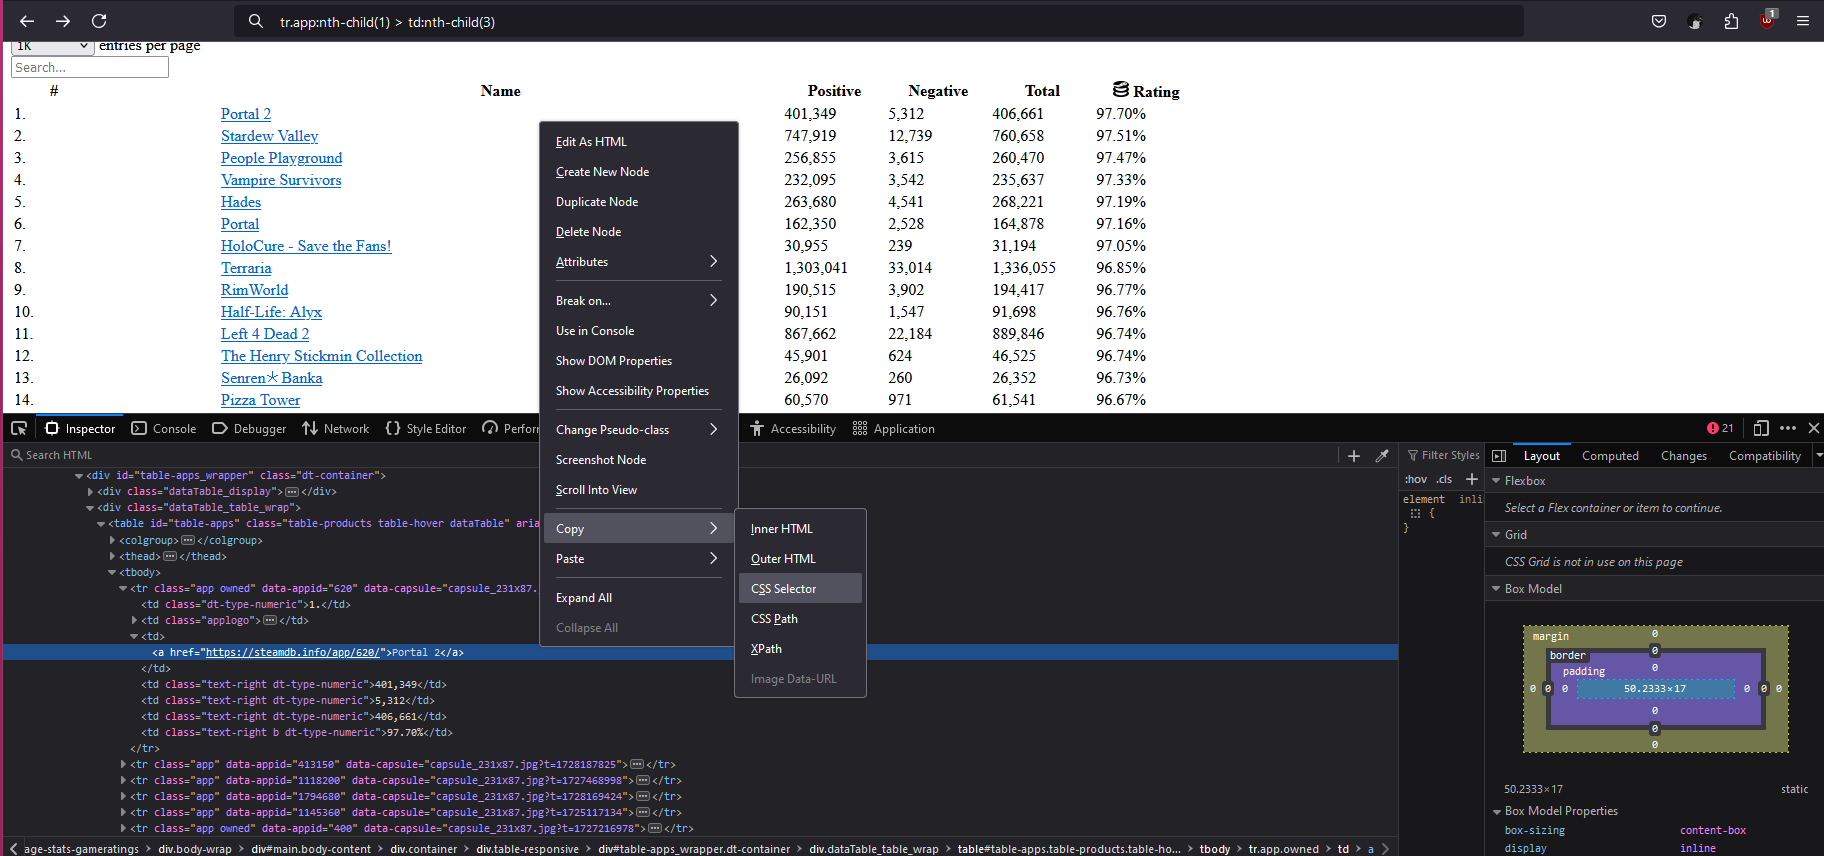

In [11]:
import IPython
from IPython.display import Image, display
display(Image(filename='steamdb2.png'))
display(Image(filename='steamdb.png'))

In [ ]:
from bs4 import BeautifulSoup  
import json

html_file_path = 'steamdb.htm'

with open(html_file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')  
all_games_data = []

rows = soup.select('tr.app')  

# iterar para pegar todas as informações
for i in range(1000):
    if i < len(rows):
        row = rows[i]  

        rank_number = row.select_one('td.dt-type-numeric').text
        game_name = row.select_one('td:nth-child(3) > a:nth-child(1)').text
        positive_ratings = row.select_one('td:nth-child(4)').text
        negative_ratings = row.select_one('td:nth-child(5)').text
        total_reviews = row.select_one('td:nth-child(6)').text
        rating_percentage = row.select_one('td:nth-child(7)').text

        # Entrada de dicionario para escrever no json
        new_entry = {
            'rank': rank_number,
            'name': game_name,
            'positive ratings': positive_ratings,
            'negative ratings': negative_ratings,
            'total reviews': total_reviews,
            'rating percentage': rating_percentage
        }

        all_games_data.append(new_entry)

json_file_path = '../3_game_ratings.json'

# importante usar encoding utf-8 e ensure_ascii para não quebrar com os jogos em japonês/chinês escritos com kanji
with open(json_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(all_games_data, json_file, ensure_ascii=False, indent=4)  

print(f"Data written to {json_file_path}: {all_games_data}")


## Fonte de dados 2: Internet Game Database (IGDB) (0.1.2)
Apesar das informações coletadas serem incentivantes, a partir de uma reflexão do grupo percebemos que esses dados não seriam suficientes para análises mais interessantes. Haja visto que o SteamDB oferece apenas três variáveis: avaliações positivas, negativas e o total. O rating é derivado do quociente entre as avaliações positivas e negativas e o ranking dos ratings mais altos. Nesse sentido, procuramos formas de reunir outras informações sobre esses jogos. A mais simples e copiosamente trabalhosa seria de preencher manualmente informações das mil entradas. Informações que desejavamos eram dados como data de lançamento, em que plataforma foi publicado o jogo, gênero do jogo, se é individual ou multijogador, uma nota mais geral dos críticos para comparar com as reviews da Steam. A segunda opção seria utilizar alguma API para fornecer os dados dos mil jogos em sequência e retornar as informações sobre eles. A segunda opção parecia mais sã e viável, só que dado a inexperiência dos participantes em relação as questões das especificidades das requisições de API, acabou demorando tanto quanto a frugal atividade copiosa de preencher as mil entradas tal qual um monge em um scriptorium medieval. Encontramos algumas opções, entre elas um site chamado [RAWG](https://rawg.io/apidocs) e outro [IGDB](https://api-docs.igdb.com/#getting-started), apesar de ambos terem uma opção gratuita, o IGDB era inteiramente gratuito e olhando sua documentação parecia ser um pouco mais simples e tinha um wrapper escrito em python (o que animou a primeira vista). Acabou que o empacotador era muito rudimentar/não soubemos como utilizar e acabamos por utilizar os requests normalmente através das endpoints. O empacotador mais desenvivolvido pela equipe do IGDB era em javascript, mas ninguém da equipe sabendo bolhufas da lingua decidimos bater a cabeça com python mesmo.

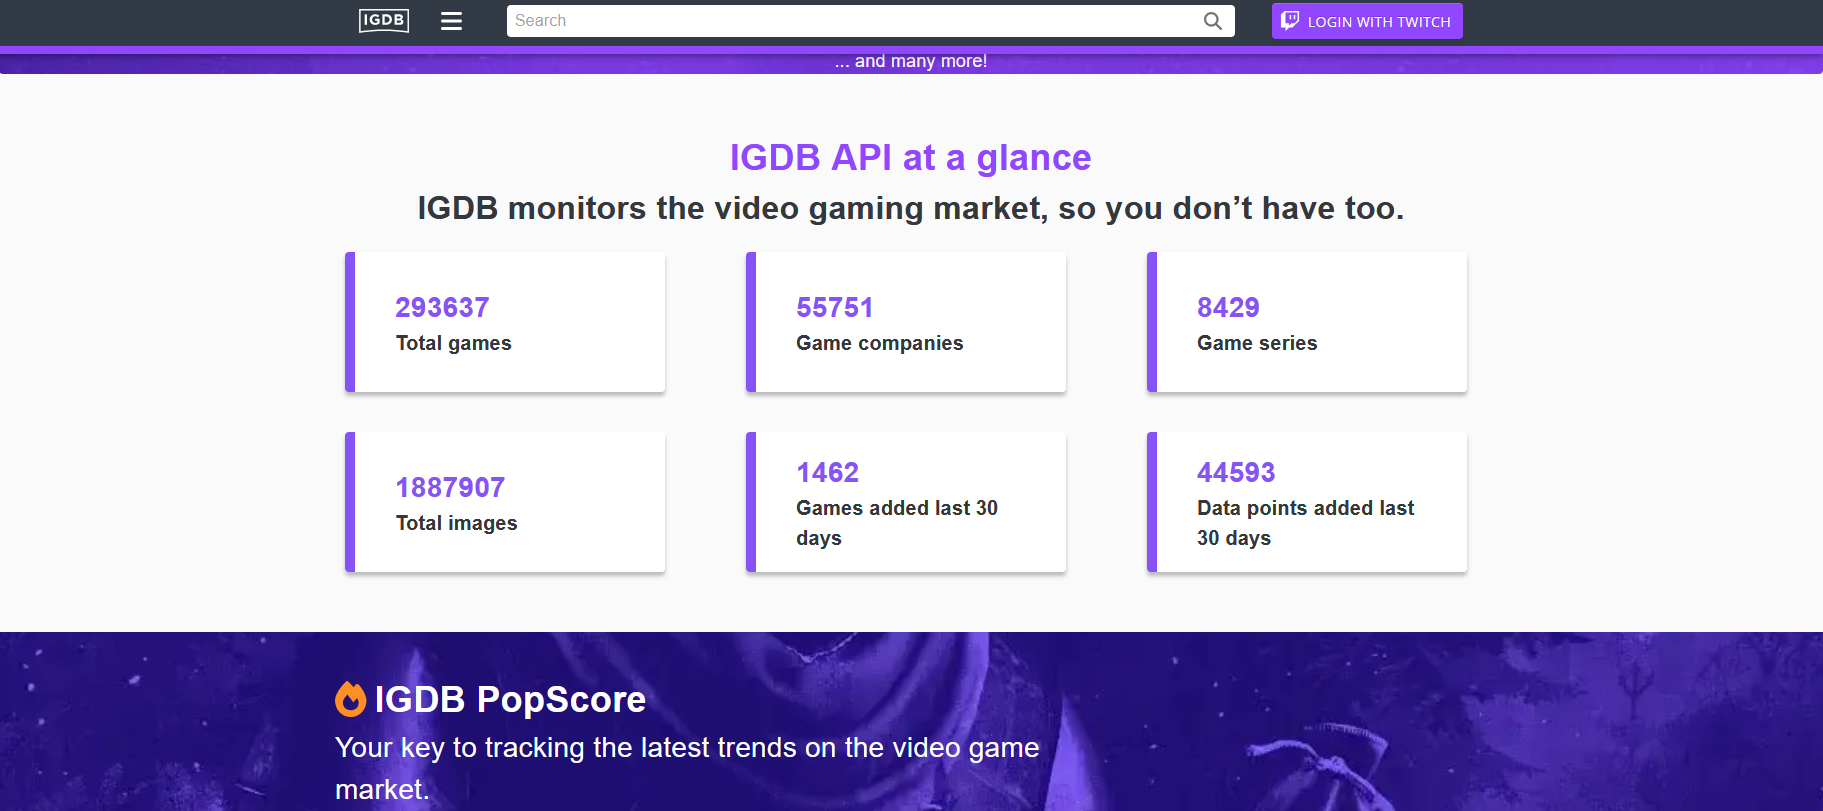

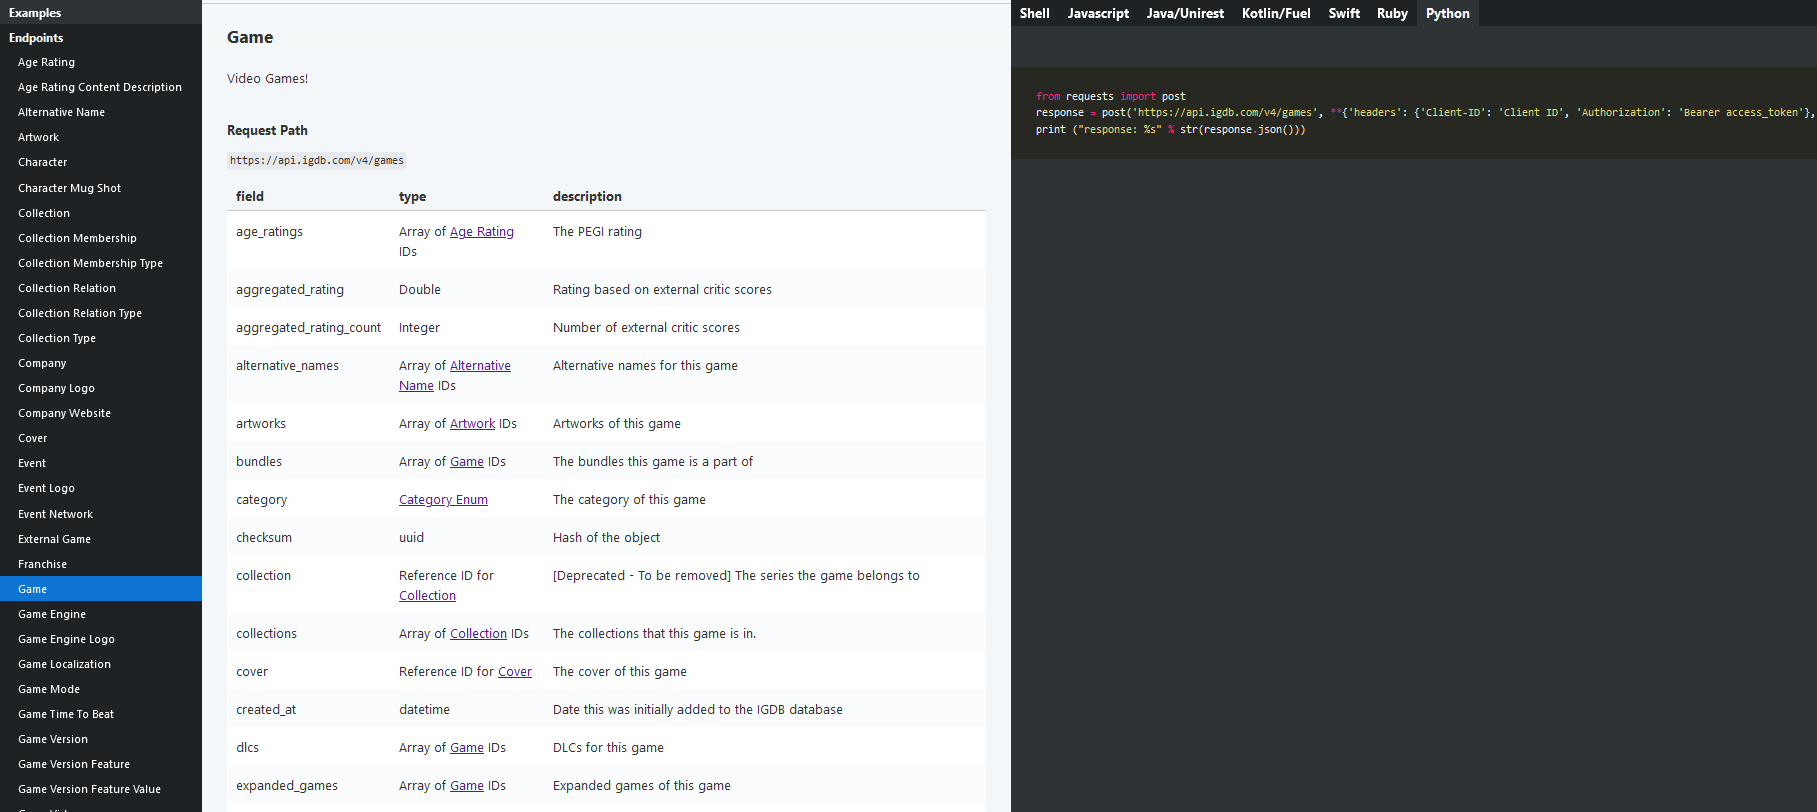

In [13]:
display(Image(filename='igdb.png'))
display(Image(filename='igdb2.png'))

Uma forma mais simples de fazer uma requisição para o IGDB: 

In [ ]:
import requests
import json
import os
from dotenv import load_dotenv

load_dotenv()

# Credenciais
client_id = os.getenv('CLIENT_ID')
acess_token = os.getenv('CLIENT_SECRET')
api_url = 'https://api.igdb.com/v4/'

HEADERS = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {acess_token}'
}

game_name = "Red Dead Redemption"

url_endpoint = 'games'
current_request_url = api_url + url_endpoint
# examples:
#   data = 'fields name,category,platforms; limit 20;'
#   data = 'fields name,rating; sort rating desc; limit 20;'
data = f'search "{game_name}"; fields name;'

# Requisição
response = requests.post(current_request_url, headers=HEADERS, data=data)

if response.status_code == 200:
    print("Request Sucess")
    print(response.text)
    with open('data.json', 'w') as json_file:
        json.dump(response.json(), json_file, indent=4)
else:
    print(f"Request Error: {response.status_code}")
    print(response.text)

Isso pressupõe já ter um token de autorização que envolve ter uma conta da Twitch e cadastrar uma credencial na própria Twitch e depois fazer uma requisição post utilizando as credenciais de usuário adquiridas na aplicação da Twitch (client id e client secret) fazemos a requisição POST nesse formato 

``` bash
POST: https://id.twitch.tv/oauth2/token?client_id=abcdefg12345&client_secret=hijklmn67890&grant_type=client_credentials
```
para que o servidor do IGDB retorne um json com o Token de Acesso para a API:

```json
{
  "access_token": "access12345token",
  "expires_in": 5587808,
  "token_type": "bearer"
}
```

Com o Client ID e Acess Token é possível realizar a requisição enquanto a API do IGDB como demonstrado no exemplo do código em Python acima. As limitações da API são de 4 requisições por segundo, o que é muito bom, significa que cada vez que rodava as requisições para os mil jogos seria 4 minutos e 10 segundos. 

$$
\frac{1000 \text{ (jogos)}}{4 \text{ (requisições)}} = \frac{250 \text{ segundos}}{60 \text{ segundos}} = 4 \text{ minutos e } 10 \text{ segundos.}
$$


E isso foi importante porque rodamos incontáveis vezes esse código até sair algo satisfatório. 

### Como fazemos as requisições para a API?
```python
class IGDBApiWrapper:

    all_games_tmp_file = 'fetch_details_for_all_games.json'

    # autorização
    def __init__(self):
        load_dotenv()
        self.client_id = os.getenv('CLIENT_ID')
        self.access_token = os.getenv('CLIENT_SECRET')
        self.api_url = 'https://api.igdb.com/v4/'
        self.headers = {
            'Client-ID': self.client_id,
            'Authorization': f'Bearer {self.access_token}'
        }

    # requisição geral
    def _make_request(self, endpoint, data):
        url = f"{self.api_url}{endpoint}"
        response = requests.post(url, headers=self.headers, data=data)
            
        return response.json()
        
    # pesquisar um jogo
    def search_game_details(self, game_name, search_query=0):
        req_ask = f'search "{game_name}"; fields *;'
        game_data = self._make_request('games', data=req_ask)
        
        return game_data[search_query]

    # funcao para escrever info no json
    def load_games_data(self, file_path):
        with open(file_path, 'r', encoding='utf-8') as json_file:
            return json.load(json_file)


    # funcao principal para pegar o id das informacoes sobre todos os jogos
    def fetch_details_for_all_games(self, read_file_path, initial_limit=0, end_limit=0):
        games_data = self.load_games_data(read_file_path)

        results = {}
        # segundo a database o limite é de 4 requisições por segundo
        request_limit_per_second = 4  
        delay_between_requests = 1 / request_limit_per_second  

        if initial_limit != 0 or end_limit != 0:  
            games_data = dict(list(games_data.items())[initial_limit:end_limit])
            
        for game_name, details in games_data.items():
            print(f"Fetching details for: {game_name}")
            try:
                game_details = self.search_game_details(game_name)
                results[game_name] = game_details
            except requests.HTTPError as e:
                print(f"Error fetching details for {game_name}: {e}")
            time.sleep(delay_between_requests)

            
        self.write_data_to_file(results, output='fetch_details_for_all_games.json')

        return results

        # funcao exemplo de retornar as informações com os ids supridos pelo arquivo json que gerado pela função fetch_details_for_all_games()
        def fetch_genre_for_all_games(self, file_path, initial_limit=0, end_limit=0):
            games_data = 'fetch_details_for_all_games.json'
            tmp_file_exists = self.check_baseline_info()

            # checar se o arquivo com os ids das categorias dos endpoints esta disponivel
            if tmp_file_exists:
                games_data = tmp_file_exists 
            else:
                print("Baseline info not present. Getting from API...")
                games_data = self.fetch_details_for_all_games(file_path, initial_limit, end_limit)

            all_games_data = self.load_games_data(games_data)

            genres_names = {}
            genres = {}
            for game_name in games_data.keys():
                print(game_name)
                game_data = games_data[game_name]

                # Verificar se a chave 'genres' existe antes de acessar
                if 'genres' in game_data:
                    id_genres = game_data['genres']
                    id_genres_str = ', '.join(map(str, id_genres))

                    # Solicitar nomes dos gêneros
                    req_ask = f'fields id, name; where id = ({id_genres_str});'
                    genres_data = self._make_request(endpoint='genres', data=req_ask)

                    # Obter apenas os nomes dos gêneros retornados
                    genre_names = [genre['name'] for genre in genres_data]
                else:
                    genre_names = []  # Definir lista vazia se a chave 'genres' não estiver presente

                genres[game_name] = genres_data if 'genres' in game_data else []
                genres_names[game_name] = genre_names

            # Substituir os ids antigos dos gêneros pelos nomes dos gêneros
            for game_name in all_games_data:
                all_games_data[game_name]['genres'] = genres_names.get(game_name, [])

            self.write_data_to_file(data=all_games_data, output='fetch_genre_for_all_games.json')

            return genres_names
```

Esse é um exemplo real de como pediamos para a API as informações específicas. Quando se pergunta por um jogo para a API no endpoint /game ela retorna apenas os ids das informações que precisa ser processada por cada enpoint específico daquela informação. Por exemplo, perguntar o genero de um jogo retorna o ID desse gênero que precisa ser processado na endpoint /genres. Por isso, decidimos por só pegar todos os ids e sobrescrever em um arquivo json. A string que a API retornava fica no lugar do ID que servia para fazer a requisição. Levou muito tempo para chegar nessa solução e ela não funciona 100% para todos os endpoints, haja vista que alguns não retornam strings como requisitado pelo 'name', por vezes retornam valores, listas, int. Assim como a forma de pedir por essa informação também varia de acordo com a documentação da endpoint. Para isso, separamos essas funções específicas em funções e colocamos em uma classe. Depois de muito bater a cabeça e rodar códigos quebrados conseguimos juntar o Dataset que era o principal objetivo.


Após diversas tentativas conseguimos criar um arquivo que saiu algo minimamente aceitável, ainda que não tenhamos conseguido 100% de todas as informações que desejávamos. Ainda ficaram algumas informações de fora como o tempo para zerar o jogo ou a empresa que produziu o jogo. Mas haja vista que toda essa interpérie fez o grupo atrasar o prazo da avaliação decidimos por fechar os trabalhos em relação a API e eliminar esses alguns dados que não conseguimos. Os dados do SteamDB estão em perfeito estado - não há nenhuma inconstância - já do lado do IGDB não são 100% constantes com o retorno da API. Algumas algumas entradas não estão presentes por diversos fatores. Isso constituindo uma característica compreendível, haja vista que seu banco de dados é alimentado também pela comunidade e não há dados de todos os jogos possíveis. Mas observando por um lado positivo, dos 1000 jogos do ranking da Steamdb apenas 76 jogos não estavam disponíveis como entrada no IGDB API. 

$$
\left( \frac{76}{1000} \right) \times 100 = 7.6\%
$$

Inversamente detemos informação de 92% dos dados.

$$
100\% - 7.6\% = 92.4\%
$$

Entre esses 76 jogos, reunimos as informações sobre cada um deles e sua posição no ranking (Disponível na pasta Extras/nomes_dos_jogos/missing.txt). 
```yml
106: Sabbat of the Witch                       112: Dishonored RHCP                     145: Steins Gate                          156: The Textorcist - The Story of Ray Bibbia
170: Sally Face                                195: Batman - Arkham Asylum              205: SuchArt - Genius Artist Simulator    214: Until Then
217: Maitetsu: Last Run!!                      221: Arrow a Row                         228: 买个可乐饼吧！ - Buy a Croquette!     229: LEGO Star Wars - The Complete Saga
232: Batman - Arkham City                      246: Kannagi Usagi                       274: Titanfall 2                          306: Abnormal Treatment
307: Doronko Wanko                             362: The Planet Crafter Prologue         364: Tales of the Neon Sea                368: The Elder Scrolls IV - Oblivion - Game of the Year Edition Deluxe
372: Medieval II - Total War                   383: Migrant Bird                        386: Spiritfarer - Farewell Edition       399: Black Box Lss - The Shining Immortal
404: Homicipher - Prologue                     408: Dusk of the Gods                    431: Tukoni Prologue                      432: South Scrimshaw
439: 彼方的她 - Aliya                           442: Lay a Beauty to Rest                445: Tsukikage no Simulacre               452: Deathly Stillness
463: Flowers - Le volume sur ete               464: Touhou Hero of Ice Fairy            466: Valiant Hearts - The Great War       471: Rusted Warfare
502: Kaiju Princess                            508: 枝江畔之梦                           513: Needy Streamer Overload              537: Tails Noir Prologue
549: Mafia II                                  559: 像素女友                             560: LEGO Marvel Super Heroes             571: 我的小鲨鱼
577: Steins;Gate 0                             586: 9-nine Episode 2                    594: Star Wars Battlefront                603: I Made a Game with Zombies in It!
625: Wataju - My Super Fulfilling Real Life    628: 时间切片：序章                       642: A Space For The Unbound              663: Maitetsu - Pure Station
674: Feeding Frenzy 2 - Shipwreck Showdown     706: Skyrim Script Extender              714: Save Room - Organization Game        721: Crime Scene Cleaner - Prologue
744: NOeSIS02 - 羽化                            753: Exception                           763: Warhammer 40000 - Dawn of War       779: NOeSIS01 - 诉说谎言的记忆之物语
812: 恋爱绮谭 - 不存在的真相                     815: 9-nine Episode 4                    837: NIGHT-RUNNERS PROLOGUE               848: Soulstone Survivors - Prologue
861: Tetris Effect - Connected                 872: Irmão Grande & Brasileiro 2         883: 所向之未来                            896: The Riftbreaker - Prologue
918: Bishoujo Mangekyou                        936: Hyperdimension Neptunia Re Birth    941: Bunny E-shop                         958: Mass Effect 2
959: LEGO Star Wars III - The Clone Wars       960: DFHack Modding Engine               982: TCG Card Shop Simulator              996: 学生时代：序章

```

Alguns dos jogos não estavam disponíveis no IGDB, outros estavam dando erro mesmo da API, alguns eram trial ou mods que não estavam disponíveis na biblioteca, esse problema foi presente principalmente nos títulos japoneses. 

Não querendo aceitar a derrota, recorreremos a preencher todos esses dados que estavam faltando de **forma manual**. Depois de uma longa e interminavel noite preenchemos todas as entradas com as informações que faltavam e poderiamos seguir então para a próxima etapa.



## Limpeza do Dataset (0.1.3)

Bom, tinhamos que fazer uma limpeza em algumas variáveis que viriam a dar erro nos códigos das análises: valores como strings, valores com vírgulas, problemas de blackslash nas strings das plataformas e dos gêneros. Uma pletora de elementos para o caos no código da análise. Na pasta ./Extras/Data_Cleasing há alguns dos métodos utilizados para limpar os dados. 
Os campos no dataset finais foram:
```
name, positive ratings, negative ratings, total reviews, rating percentage, category, first_release_date, platforms, genres, aggregated_rating, aggregated_rating_count, public_rating_igdb, public_rating_count, game_engines, game_modes, player_perspectives*
```
```json
    {
        "name": "Black Myth: Wukong",
        "positive ratings": 888106,
        "negative ratings": 34930,
        "total reviews": 923036,
        "rating percentage": "95.48%",
        "category": "main_game",
        "first_release_date": 1724112000,
        "platforms": [
            "PC (Microsoft Windows)",
            "PlayStation 5",
            "Xbox Series X|S"
        ],
        "genres": [
            "Role-playing (RPG)",
            "Adventure"
        ],
        "aggregated_rating": 8.8,
        "aggregated_rating_count": 5.0,
        "public_rating_igdb": 8.8,
        "public_rating_count": 95,
        "game_engines": [
            "Unreal Engine 5"
        ],
        "game_modes": [
            "Single player"
        ],
        "player_perspectives": [
            "Third person"
        ]
    },
```
#### Explicando cada um:
- ***name*** = nome do jogo (SteamDB)
- ***positive ratings*** = diz respeito as avaliações positivas do jogo na steam. (SteamDB)
- ***negative ratings*** = diz respeito as avaliações negativas do jogo na steam. (SteamDB)
- ***total reviews*** = total das reviews do jogo na steam tanto positiva quanto negativas. (SteamDB)
- ***ratine percentage*** = quociente entre reviews positivas e negativas, esse é o dado utilizado para rankear os jogos. (SteamDB)
- ***category*** = se o jogo é um jogo principal, dlc, mod, remake etc. (IGDB)
- ***first_release_date*** = primeira data de lançamento do jogo em unix timestamp. (IGDB)
- ***platforms*** = plataformas em que o jogo foi lançado. (IGDB)
- ***gêneros*** = gênero do jogo. (IGDB)
- ***aggregated_rating*** = média da nota dos críticos dos veículos de imprensa. (IGDB)
- ***aggregated_rating_count*** = quantidade de críticos que construíram essa média. (IGDB)
- ***public_rating_count*** = nota pública das pessoas dada no site do IGDB. (IGDB)
- ***public_rating_count*** = quantidade de pessoas que deram nota no site. (IGDB)
- ***game_engine*** = engine de programação utilizada pelos desenvolvedores do jogo. (IGDB)
- ***game_mode*** = Jogador individual, multijogador etc. (IGDB)
- ***player_perspectives*** = perspectiva do jogador, sendo primeira pessoa, terceira pessoa etc. (IGDB)

In [109]:
import pandas as pd
df = pd.read_csv('games_data.csv')

# Exibir as colunas do DataFrame
print("Colunas disponíveis no DataFrame:")
print(df.columns)


Colunas disponíveis no DataFrame:
Index(['name', 'positive ratings', 'negative ratings', 'total reviews',
       'rating percentage', 'category', 'first_release_date', 'platforms',
       'genres', 'aggregated_rating', 'aggregated_rating_count',
       'public_rating_igdb', 'public_rating_count', 'game_engines',
       'game_modes', 'player_perspectives'],
      dtype='object')


In [113]:
import pandas as pd
df = pd.read_csv('games_data.csv')
print(df.dtypes)

name                        object
positive ratings             int64
negative ratings             int64
total reviews                int64
rating percentage           object
category                    object
first_release_date           int64
platforms                   object
genres                      object
aggregated_rating          float64
aggregated_rating_count    float64
public_rating_igdb          object
public_rating_count        float64
game_engines                object
game_modes                  object
player_perspectives         object
dtype: object


## Detalhando as perguntas de análise

Separamos cada pergunta em outras menores para responder com um melhor grau de acuidade

### 1) Quais são os gêneros de jogos que tem as melhores classificações médias? 🤔
**Quais gêneros de jogos têm as melhores avaliações médias?**
- 📝 **Justificativa:** A ideia aqui é descobrir quais tipos de jogos são mais bem avaliados pelo público e pela crítica, ajudando a entender as preferências de cada grupo.
- 📈 **Análise:** 1.3.5 Gênero de jogos com mais avaliações positivas e negativas
- ✅ **Resposta:** Em ambos os casos os Gêneros de aventura despontam como os gêneros com mais avaliações tantos positivas quanto negativas 

**Quais são os gêneros mais populares entre o público e a crítica?**
- 📝 **Justificativa:** Gráficos foram criados para mostrar quais gêneros são mais bem recebidos pelos jogadores e pela crítica, ajudando a visualizar a diferença de percepção entre os dois.
- 📈 **Análise:** 3.3 Gráficos sobre gêneros de jogos
- ✅ **Resposta:** 

#### Sumário das análises supracitadas:
- 1.3.5 Gênero de jogos com mais avaliações positivas e negativas
    - 1.3.5.a Listagem de gêneros dos jogos
    - 1.3.5.b Generos que apresentam o maior numero de reviews positivas e negativas na Steam 
- 3.3 Gráficos sobre gêneros de jogos
    - 3.3.1 Gêneros de jogos de maior sucesso entre o público
    - 3.3.2 Gêneros de jogos de maior sucesso entre os veículos de crítica
    - 3.3.3 Comparativo entre crítica vs. público 
        - 3.3.3.a Tabela comparativa

### 2) Quais são as plataformas com mais jogos entre os mil mais bem avaliados da Steam? 🤔

**Quais são as plataformas com mais avaliações positivas e negativas entre os mil mais bem avaliados da Steam?** ❓
- 📝 **Justificativa:** Esta pergunta investiga quais plataformas têm as maiores quantidades de avaliações positivas e negativas entre os jogos mais bem avaliados na Steam. O objetivo é identificar a recepção dos usuários em relação a essas plataformas e como isso pode influenciar a classificação dos jogos.
- 📈 **Análise:** 1.3.2 Plataforma com mais avaliações positivas e negativas 
- ✅ **Resposta:** 

**Quais são as plataformas que mais lançaram jogos entre 1992 e 2004, e como isso se reflete nos mil jogos mais bem avaliados da Steam?** ❓
- 📝 **Justificativa:** Aqui, a pergunta busca determinar quais plataformas foram responsáveis pelo maior número de lançamentos de jogos durante o período de 1992 a 2004. Além disso, relaciona esses dados com a avaliação dos jogos na Steam, explorando se um maior volume de lançamentos se correlaciona com a qualidade ou a popularidade dos jogos.
- 📈 **Análise:** 3.1.1 As dez plataformas que mais lançaram jogos entre 1992 e 2004. 
- ✅ **Resposta:** 

**Quais são as plataformas que mais lançam jogos por ano, e como isso influencia a presença de jogos entre os mil mais bem avaliados da Steam?** ❓
- 📝 **Justificativa:** Esta pergunta analisa quais plataformas têm o maior número de lançamentos de jogos por ano. O foco é entender se uma alta frequência de lançamentos está associada a uma maior presença entre os jogos mais bem avaliados na Steam, investigando a relação entre quantidade e qualidade dos jogos.
- 📈 **Análise:** 3.1.2 As dez plataformas que mais lançaram jogos por ano
- ✅ **Resposta:** 

#### Sumário das análises supracitadas:
- 1.3.2 Plataforma com mais avaliações positivas e negativas
- 3.1 Plataformas
    - 3.1.1 As dez plataformas que mais lançaram jogos entre 1992 e 2004.
    - 3.1.2 As dez plataformas que mais lançaram jogos por ano.

### 3) Há alguma relação entre os jogos mais populares serem os mais bem avaliados? 🤔
**Há alguma relação entre os jogos mais populares serem os mais bem avaliados?** ❓
- 📝 **Justificativa:** Esta pergunta investiga se existe uma conexão entre a popularidade dos jogos e suas avaliações. O objetivo é entender se os jogos que são mais jogados e conhecidos também tendem a ter melhores avaliações na Steam.
- 📈 **Análise:** 3.2.1 Uma boa avaliação do jogo na Steam se relaciona com o total de reviews?

**Representação gráfica da correlação entre razão positiva de reviews e o total** ❓
- 📝 **Justificativa:** Esta pergunta se concentra em visualizar a relação entre a razão de avaliações positivas e o total de reviews de um jogo. A análise gráfica pode revelar padrões e tendências importantes na recepção dos jogos.
- 📈 **Análise:** 3.2.2 Representação grafica da correlação entre razão positiva de reviews e o total 
- ✅ **Resposta:** 

#### Sumário das análises supracitadas:
- 3.2 Correlação Avaliativa
    - 3.2.1 Uma boa avaliação do jogo na Steam se relaciona com o total de reviews?
    - 3.2.2 Representação grafica da correlação entre razão positiva de reviews e o total 
        - 3.2.2.a Adereçando dados outliers para melhorar visualização do gráfico 


[^](#)
# Análises:
## Parte 1: Medidas de Centralidade
- 1.1 Médias
    - 1.1.1 Médias do SteamDB
    - 1.1.2 Médias do Internet Game Database
- 1.2 Medianas
    - 1.2.1 Mediana das informações do SteamDB
    - 1.2.2 Mediana das informações do Internet Game Database
- 1.3 Modas/Agrupamentos
    - 1.3.1 Modo de jogo com mais avaliações positivas e negativas
    - 1.3.2 Plataforma com mais avaliações positivas e negativas
    - 1.3.3 Game engine com mais avaliações positivas e negativas 
    - 1.3.4 Perspectiva do jogador com mais avaliações positivas e negativas 
    - 1.3.5 Gênero de jogos com mais avaliações positivas e negativas
        - 1.3.5.a Listagem de gêneros dos jogos
        - 1.3.5.b Generos que apresentam o maior numero de reviews positivas e negativas na Steam 

### Médias (1.1)
#### Médias do SteamDB (1.1.1)

In [ ]:
import pandas as pd

df = pd.read_csv('games_data.csv')


media_total_reviews = df['total reviews'].mean()
media_positiva_reviews = df['positive ratings'].mean()
media_negativa_reviews = df['negative ratings'].mean()

print(f'Média das Reviews Totais: {media_total_reviews:.2f}')
print(f'Média das Reviews Positivas: {media_positiva_reviews:.2f}')
print(f'Média das Reviews Negativas: {media_negativa_reviews:.2f}\n')



Média das Reviews Totais: 39759.45
Média das Reviews Positivas: 38218.62
Média das Reviews Negativas: 1540.84



Com esses dados podemos afirmar que a média de um jogo para reviews positivas é de aprox. 38 mil.
Já as reviews negativas tem como média aprox. 1500 avaliações.
No todo, um jogo em média, detém aprox 40 mil avaliações.

#### Médias das informações do IGDB (1.1.2)

In [ ]:
import pandas as pd

df = pd.read_csv('games_data.csv')

# Limpeza: remover espaços em branco e substituir valores não numéricos por NaN
df['public_rating_igdb'] = df['public_rating_igdb'].str.strip()  # Remove espaços em branco
df['public_rating_igdb'] = pd.to_numeric(df['public_rating_igdb'], errors='coerce')  # Converte para float, substitui não numéricos por NaN


media_aggregated_rating = df['aggregated_rating'].mean()
media_aggregated_rating_count = df['aggregated_rating_count'].mean()
media_public_rating_igdb = df['public_rating_igdb'].mean()
media_public_rating_count = df['public_rating_count'].mean()

print(f"Média dos críticos para todos os jogos: {media_aggregated_rating}")
print(f"Em média da quantidade de críticos que votaram em cada jogo: {media_aggregated_rating_count}")
print(f"Média da nota pública dos jogos: {media_public_rating_igdb}")
print(f"Média da contagem de votantes públicos em cada jogo: {media_public_rating_count}")


Média dos críticos para todos os jogos: 8.69670588235294
Em média da quantidade de críticos que votaram em cada jogo: 6.738823529411765
Média da nota pública dos jogos: 7.806638418079095
Média da contagem de votantes públicos em cada jogo: 183.1923620933522


Temos como média da nota dos críticos 8.69, já do público 7.80. Respectivamente, cada nota dos críticos - em média - tiveram 6 veículos de comunicação. Já do público, houveram - em média 183 votantes.

### Medianas (1.2)

#### Mediana das informações do SteamDB (1.2.1)

In [ ]:
import pandas as pd
df = pd.read_csv('games_data.csv')

mediana_positiva_reviews = df['positive ratings'].median()
mediana_negativa_reviews = df['negative ratings'].median()
mediana_total = df['total reviews'].median()


print(f'Mediana das Reviews Positivas: {mediana_positiva_reviews:.2f}')
print(f'Mediana das Reviews Negativas: {mediana_negativa_reviews:.2f}')
print(f'Mediana do Total de Reviews: {mediana_total:.2f}\n')

Mediana das Reviews Positivas: 7687.00
Mediana das Reviews Negativas: 268.00
Mediana do Total de Reviews: 8004.50



Com a mediana, podemos deduzir que provavelmente o nosso dataset de jogos apresenta dados assimétricos a presença forte de outliers. Haja vista que a mediana das reviews positivas é de apenas 7687, de negativas 268 e totais de 8004.5 reviews o que difere bastante das médias apresentadas anteriormente.

#### Mediana das informações do IGDB (1.2.2)

In [ ]:
import pandas as pd
df = pd.read_csv('games_data.csv')


# Limpeza: remover espaços em branco e substituir valores não numéricos por NaN
df['public_rating_igdb'] = df['public_rating_igdb'].str.strip()  # Remove espaços em branco
df['public_rating_igdb'] = pd.to_numeric(df['public_rating_igdb'], errors='coerce')  # Converte para float, substitui não numéricos por NaN

mediana_aggregated_rating = df['aggregated_rating'].median()
mediana_aggregated_rating_count = df['aggregated_rating_count'].median()
mediana_public_rating_igdb = df['public_rating_igdb'].median()
mediana_public_rating_count = df['public_rating_count'].median()

print(f"Mediana dos críticos para todos os jogos: {mediana_aggregated_rating}")
print(f"Mediana da quantidade de críticos que votaram em cada jogo: {mediana_aggregated_rating_count}")
print(f"Mediana da nota pública dos jogos: {mediana_public_rating_igdb}")
print(f"Mediana da contagem de votantes públicos em cada jogo: {mediana_public_rating_count}")

Mediana dos críticos para todos os jogos: 8.4
Mediana da quantidade de críticos que votaram em cada jogo: 4.0
Mediana da nota pública dos jogos: 8.0
Mediana da contagem de votantes públicos em cada jogo: 33.0


Mediana dos críticos para os jogos é 8.4 que é relativamente próximo da média o que indica uma possível dispersão pequena.
Já da quantidade de veículos de crítica é 4 e a média foi 6 que já é um pouco diferente mas não tão dispare.
A mediana da nota pública é maior do que a média (7,8) mas ainda sim, próxima.
a mediana da contagem de público votante é 5.45 vezes menor que a média (183)


### Modas/Agrupamentos (1.3)
#### Modos de jogo (Single Player, Mutiplayer...) com mais avaliações positivas (1.3.1)

* Análise adequada para saber qual modo de jogo a comunidade mais joga.
* Útil para empresas que pretendem lançar um novo jogo e querem ter a certeza que o jogo vai atender grande parte do público

In [10]:
import pandas as pd
df = pd.read_csv('games_data.csv')

#Dividindo em mais de uma linha os jogos que possuem mais de um modo de jogo
df['game_modes'] = df['game_modes'].str.strip("[]").str.replace("'", "").str.split(", ")
exploded_df = df.explode('game_modes')

#Agrupando cada modo de jogo e somando suas avaliações
grouped_df = exploded_df.groupby('game_modes').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

#Usando a função sort para ordenar 
grouped_df_sorted = grouped_df.sort_values(by='positive ratings', ascending=False)

# Exibir os dados ordenados
print("Modos de jogo com suas respectivas avaliaçoes negativas e positivas ordenadas:")
print(grouped_df_sorted.head())

Modos de jogo com suas respectivas avaliaçoes negativas e positivas ordenadas:
                           game_modes  positive ratings  negative ratings
4                       Single player          37164567           1492164
3                         Multiplayer          18466724            775314
1                        Co-operative          16053468            676227
5                        Split screen           2535048            123443
2  Massively Multiplayer Online (MMO)            414730             27776


Aqui podemos perceber que o modo Single Player acumula a maior quantidade de ratings positivos enquanto o modo Multiplayer vem em segundo lugar.

### Plataforma com mais avaliações positivas e negativas (1.3.2)

* Análise adequada para identificar qual a plataforma com mais usuários ativos jogando.
* Útil para empresas que precisam identificar onde está o maior número de jogadores ativos 

In [10]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('games_data.csv')

# Dividindo em mais de uma linha os jogos que possuem mais de uma plataforma
explode_df = df.explode('platforms')

# Separando corretamente as plataformas (caso estejam separadas por vírgulas)
explode_df['platforms'] = explode_df['platforms'].str.split(',')
explode_df = explode_df.explode('platforms')

# Removendo espaços extras nas plataformas após a separação
explode_df['platforms'] = explode_df['platforms'].str.strip()

# Agrupar pelos nomes das plataformas e somar as avaliações positivas e negativas
grouped_df = explode_df.groupby('platforms').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

# Ordena para encontrar a segunda plataforma com mais avaliações positivas e negativas
# Já que a primeira sempre vai ser o PC, por ser da steam as avaliações
second_most_positive_platform = grouped_df.sort_values(by='positive ratings', ascending=False).iloc[1]
second_most_negative_platform = grouped_df.sort_values(by='negative ratings', ascending=False).iloc[1]

# Exibir os resultados
print(f"Plataforma com mais avaliações positivas: {second_most_positive_platform['platforms']} "
      f"com {second_most_positive_platform['positive ratings']} avaliações positivas.")

print(f"Plataforma com mais avaliações negativas: {second_most_negative_platform['platforms']} "
      f"com {second_most_negative_platform['negative ratings']} avaliações negativas.")


Plataforma com mais avaliações positivas: 'PlayStation 4' com 14975326 avaliações positivas.
Plataforma com mais avaliações negativas: 'PlayStation 4' com 644374 avaliações negativas.


### Game engine com mais avaliações positivas e negativas (1.3.3)

* Análise adequada para identificar qual a engine que fabrica melhores jogos e qual fabrica os piores
* Útil para empresas que precisam escolher a melhor engine na hora de fazer um jogo

In [18]:
import pandas as pd
df = pd.read_csv('games_data.csv')

# Dividindo em mais de uma linha os jogos que possuem mais de uma engine
explode_df = df.explode('game_engines')

# Agrupar pelos nomes das plataformas e somar as avaliações positivas e negativas
grouped_df = explode_df.groupby('game_engines').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

# Ordena para encontrar a plataforma com mais avaliações positivas e negativas
most_positive_engine = grouped_df.sort_values(by='positive ratings', ascending=False).iloc[0]
most_negative_engine = grouped_df.sort_values(by='negative ratings', ascending=False).iloc[0]

print(f"Engine com mais avaliações positivas: {most_positive_engine['game_engines']} "
      f"com {most_positive_engine['positive ratings']} avaliações positivas.")

print(f"Engine com mais avaliações negativas: {most_negative_engine['game_engines']} "
      f"com {most_negative_engine['negative ratings']} avaliações negativas.")

Engine com mais avaliações positivas: ['Unity'] com 8578232 avaliações positivas.
Engine com mais avaliações negativas: ['Unity'] com 364593 avaliações negativas.


#### Perspectiva do jogador com mais avaliações positivas/negativas (1.3.4)

* Análise para descobrir qual perspectiva de jogo os jogadores preferem
* Útil para empresas que pretendem acertar o público alvo

In [ ]:
import pandas as pd
df = pd.read_csv('games_data.csv')

# Atribuindo 3 colunas 
perspectives = df[['player_perspectives', 'positive ratings', 'negative ratings']]

# Agrupando e somando
grouped = perspectives.groupby('player_perspectives').sum()

# Tirando o maior valor
most_positive = grouped['positive ratings'].idxmax()
most_negative = grouped['negative ratings'].idxmax()

print(f"A perspectiva com mais avaliações positivas é: {most_positive}")
print(f"A perspectiva com mais avaliações negativas é: {most_negative}")

A perspectiva com mais avaliações positivas é: ['First person']
A perspectiva com mais avaliações negativas é: ['Third person']


### Generos de jogos com mais reviews positivas e com mais reviews negativas (1.3.5)

#### Listar os Gêneros (1.3.5.a)

In [19]:
import pandas as pd
import ast

# Carregar o arquivo CSV
df = pd.read_csv('games_data.csv')

# Converte a coluna 'genres' para listas, caso seja uma string e não seja NaN
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x)

# Expande a coluna de gêneros
all_genres = df['genres'].explode()

# Remove duplicatas e valores nulos
unique_genres = all_genres.dropna().unique()

# Imprime cada gênero em uma nova linha
for genre in unique_genres:
    print(genre)


Shooter
Puzzle
Adventure
Role-playing (RPG)
Simulator
Strategy
Indie
Arcade
hack and slash or beat em up
Platform
Real Time Strategy (RTS)
Point-and-click
Fighting
Roguelike
Tactical
Racing
Visual Novel
Music
Turn-based strategy (TBS)
Card & Board Game
Sport
Casual
Simulation
QuizTrivia
Action
Visual Nove;
Pinball
Text


#### Top 10 gêneros que apresentam o maior numero de reviews positivas e negativas na Steam (1.3.5.b)

In [23]:
import pandas as pd
import ast

# Carregar o DataFrame
df = pd.read_csv('games_data.csv')

# Avaliar a coluna 'genres' para converter strings em listas
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explodir a coluna de gêneros
expanded_df = df.explode('genres')

# Agrupar os gêneros e calcular as somas de avaliações
grouped_genres = expanded_df.groupby('genres').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

# Ordenar por reviews positivas e negativas em ordem decrescente
grouped_genres = grouped_genres.sort_values(by=['positive ratings', 'negative ratings'], ascending=[False, False])

# Mostrar apenas os 10 primeiros gêneros
top_10_genres = grouped_genres.head(10)

# Exibir os resultados dos 10 primeiros gêneros
print("{:<25} {:<20} {:<20}".format("Gênero", "Reviews Positivas", "Reviews Negativas"))
print("-" * 65)  # Linha de separação
for index, row in top_10_genres.iterrows():
    print("{:<25} {:<20} {:<20}".format(row['genres'], row['positive ratings'], row['negative ratings']))



Gênero                    Reviews Positivas    Reviews Negativas   
-----------------------------------------------------------------
Adventure                 23020354             960209              
Indie                     20670636             807073              
Role-playing (RPG)        13817077             590682              
Simulator                 12031740             453713              
Strategy                  8521817              302290              
Shooter                   7909637              325485              
Platform                  5102777              191568              
Puzzle                    4864839              180513              
Arcade                    2145395              85410               
Tactical                  2062012              76676               


In [58]:
import pandas as pd
import ast

# Carregar o DataFrame
df = pd.read_csv('games_data.csv')

# Avaliar a coluna de gêneros
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explodir os gêneros em linhas separadas
expanded_df = df.explode('genres')

# Agrupar os gêneros e somar as classificações positivas e negativas
grouped_genres = expanded_df.groupby('genres').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

# Calcular o total de reviews
grouped_genres['total_reviews'] = grouped_genres['positive ratings'] + grouped_genres['negative ratings']

grouped_genres = grouped_genres.sort_values(by='total_reviews', ascending=False)

# Exibir todos os gêneros e seus totais de reviews
print(grouped_genres[['genres', 'total_reviews']])


                          genres  total_reviews
1                      Adventure       23980563
6                          Indie       21477709
16            Role-playing (RPG)       14407759
19                     Simulator       12485453
21                      Strategy        8824107
17                       Shooter        8235122
9                       Platform        5294345
11                        Puzzle        5045352
2                         Arcade        2230805
22                      Tactical        2138688
24     Turn-based strategy (TBS)        1867844
27  hack and slash or beat em up        1696361
26                  Visual Novel        1279163
10               Point-and-click        1013844
14      Real Time Strategy (RTS)        1009610
13                        Racing         993979
7                          Music         818892
5                       Fighting         558132
0                         Action         431435
20                         Sport        

Descobrimos aqui que o gênero com mais avaliações tanto positivas quanto negativas é o gênero de aventura.

In [89]:
import pandas as pd
import ast

# Carregar o DataFrame
df = pd.read_csv('games_data.csv')

# Avaliar a coluna 'genres' para converter strings em listas
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explodir a coluna de gêneros
expanded_df = df.explode('genres')

# Contar quantos jogos existem em cada gênero
genre_counts = expanded_df['genres'].value_counts()

# Mostrar o resultado
print("{:<25} {:<15}".format("Gênero", "Número de Jogos"))
print("-" * 40)  # Linha de separação
for genre, count in genre_counts.items():
    print("{:<25} {:<15}".format(genre, count))


Gênero                    Número de Jogos
----------------------------------------
Indie                     649            
Adventure                 533            
Role-playing (RPG)        235            
Puzzle                    230            
Simulator                 226            
Strategy                  164            
Shooter                   141            
Visual Novel              117            
Platform                  108            
Point-and-click           91             
Arcade                    82             
Turn-based strategy (TBS) 36             
hack and slash or beat em up 33             
Real Time Strategy (RTS)  27             
Music                     26             
Racing                    24             
Tactical                  23             
Fighting                  20             
Casual                    20             
Sport                     16             
Action                    16             
Card & Board Game         15    

## Parte 2: Medidas de Dispersão
- 2.1 Boxplot
    - 2.1.1 Boxplot das reviews negativas
    - 2.1.2 Boxplot das reviews positivas
- 2.2 Desvio Padrão
    - 2.2.1 Desvio padrão de reviews (Positivas/Negativas)
        - 2.2.1.a Sobre as avaliações positivas
        - 2.2.1.b Sobre as avaliações negativas
    - 2.2.2 Desvio padrão do total de avaliações
        - 2.2.2.a Encontrando os outliers através do z-score do desvio padrão.

### Boxplot (2.1)
#### Boxplot das reviews negativas (2.1.1)


* Análise para observar a distribuição, dispersão e os valores fora do padrão (outliers).
* Útil para observar qual é a faixa normal de avaliações negativas para os jogos.

Q1 (1º Quartil, 25%): 82.75
Q2 (Mediana, 50%): 268.0
Q3 (3º Quartil, 75%): 1004.75
IQR (Intervalo Interquartil): 922.0


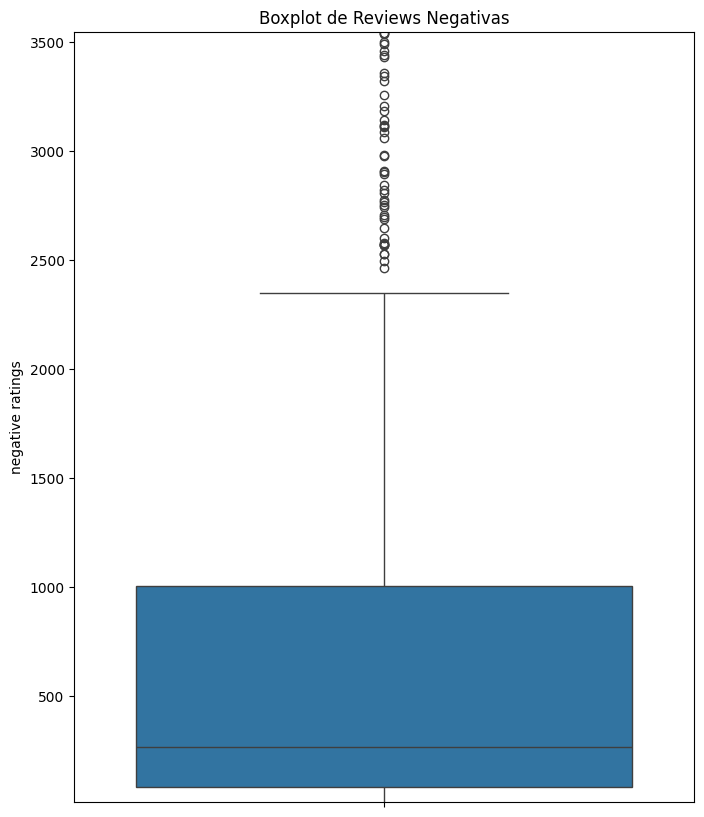

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avaliado = 'negative ratings'
df = pd.read_csv('games_data.csv')
Q1 = df[avaliado].quantile(0.25)  # Primeiro quartil (25%)
Q2 = df[avaliado].quantile(0.50)  # Mediana (50%)
Q3 = df[avaliado].quantile(0.75)  # Terceiro quartil (75%)

IQR = Q3 - Q1

print(f"Q1 (1º Quartil, 25%): {Q1}")
print(f"Q2 (Mediana, 50%): {Q2}")
print(f"Q3 (3º Quartil, 75%): {Q3}")
print(f"IQR (Intervalo Interquartil): {IQR}")


boxplot_reviews = df[avaliado]



plt.figure(figsize=(8, 10))
sns.boxplot(data=boxplot_reviews)

plt.title('Boxplot de Reviews Negativas')

plt.ylim(boxplot_reviews.quantile(0.05), boxplot_reviews.quantile(0.90))

plt.show()

* **Primeiro Quartil (Q1)** = 25% dos jogos analizados tem 82.75 ou menos reviews negativas.
* **Segundo Quartil (Q2)** = Mediana. 50% dos jogos apresenta 268 ou menos reviews negativas.
* **Terceiro Quartil (Q3)** = 75% dos jogos tem aprox. 1004.75 ou menos reviews negativas.
* **Intervalo Interquartil (IQR)** = Nos informa a variabillidade dos dados. Um IQR de 922 sugere uma dispersão considerável nos reviews negativos entre os jogos. Enquanto alguns jogos podem ser bem recebidos (menos de 82.75) outros podem ter muito feedback negativo.
* **Outliers** = Há a presença de muitos outliers o que pode distorcer a análise

#### Boxplot das reviews positivas (2.1.2)


Q1 (1º Quartil, 25%): 3177.0
Q2 (Mediana, 50%): 7687.0
Q3 (3º Quartil, 75%): 23914.25
IQR (Intervalo Interquartil): 20737.25


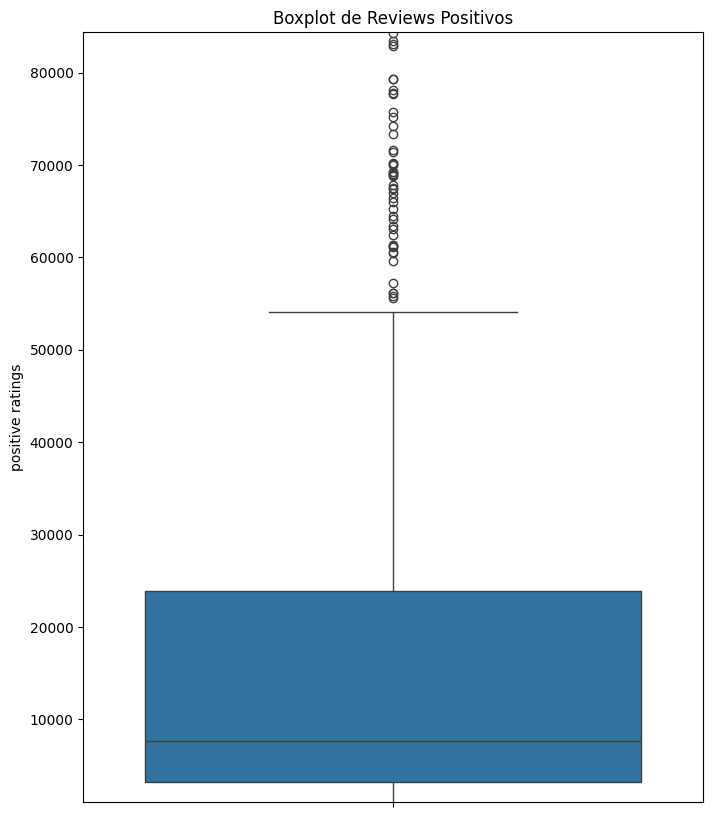

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avaliado = 'positive ratings'
df = pd.read_csv('games_data.csv')
Q1 = df[avaliado].quantile(0.25)  # Primeiro quartil (25%)
Q2 = df[avaliado].quantile(0.50)  # Mediana (50%)
Q3 = df[avaliado].quantile(0.75)  # Terceiro quartil (75%)

IQR = Q3 - Q1

print(f"Q1 (1º Quartil, 25%): {Q1}")
print(f"Q2 (Mediana, 50%): {Q2}")
print(f"Q3 (3º Quartil, 75%): {Q3}")
print(f"IQR (Intervalo Interquartil): {IQR}")


boxplot_reviews = df[avaliado]



plt.figure(figsize=(8, 10))
sns.boxplot(data=boxplot_reviews)

plt.title('Boxplot de Reviews Positivos')

plt.ylim(boxplot_reviews.quantile(0.05), boxplot_reviews.quantile(0.90))

plt.show()

- **Q1 (1º Quartil, 25%)**: 25% dos jogos analisados têm 3177.0 ou menos reviews positivos.
- **Q2 (Mediana, 50%)**: 50% dos jogos apresentam 7687.0 ou menos reviews positivos.
- **Q3 (3º Quartil, 75%)**: 75% dos jogos têm aproximadamente 23914.25 ou menos reviews positivos.
- **IQR (Intervalo Interquartil)**: O IQR é de 20737.25, indicando uma ampla variabilidade nos reviews positivos entre os jogos.


### Desvio Padrão (2.2)
#### Desvio Padrão da Quantidade de Reviews (Positivas/Negativas) (2.2.1)

* Análise para observar a dispersão das avaliações


In [92]:
import pandas as pd
df = pd.read_csv('games_data.csv')

# Calculando primeiro a media para comparar no final
mean_positive = df['positive ratings'].mean()
mena_negative = df['negative ratings'].mean()

# Calcualndo o desvio padrão
std_positive = df['positive ratings'].std()
std_negative = df['negative ratings'].std()

print(f"A media das avaliações positivas é {mean_positive:.2f} e o desvio padrao é {std_positive:.2f}")
print(f"A media das avaliações negativas é {mena_negative:.2f} e o desvio padrao é {std_negative:.2f}")


A media das avaliações positivas é 38218.62 e o desvio padrao é 105223.15
A media das avaliações negativas é 1540.84 e o desvio padrao é 4399.95


A média das avaliações positivas é cerca de 38 mil enquanto o desvio padrão é de cerca de 105 mil que é um desvio padrão muito grande comparado a média. O que também acontece com as avaliações negativas em que sua média reside em aprox. 1500 e o desvio padrão é aproximado em 4400. Em ambos os casos indica que os jogos apresentam uma grande variação nas avaliações alguns tem muito mais avaliações positivas ou negativas que a média e outros tem bem menos.

##### Sobre as avaliações positivas: (2.2.1.a)
Média alta e desvio padrão muito elevado, sugererindo assim que há muita variação nas avaliações positivas.
##### Sobre as avaliações negativas: (2.2.1.b)
Média baixa e desvio padrão mais próximo da média, sugerindo assim que há variação, mas pouca se comparada com a positva, implicando assim com que as avaliações negativas estejam sempre próximas da média

#### Desvio padrão do total de reviews 📏 (2.2.2)

In [93]:
import pandas as pd
df = pd.read_csv('games_data.csv')


total_reviews = df['total reviews']
media_total_reviews = total_reviews.mean()
stdtotalreviews = total_reviews.std()

print(f"A media do total dos reviews é {media_total_reviews}")
print(f"O desvio padrão do total dos reviews é: {stdtotalreviews}")

A media do total dos reviews é 39759.454
O desvio padrão do total dos reviews é: 109225.57031854443


* O desvio padrão 109225 é bem maior que a média aprox. 40 mil. Isso indica que há uma grande variação no número total de reviews entre os jogos.
* Em termos práticos, isso sugere que muitos jogos têm um número de reviews muito superior à média, enquanto outros têm um número muito inferior.

##### Encontrando outliers através do desvio padrão (2.2.2.a)
Se considerarmos um dado outlier se dois z-score de distância então teremos os seguintes jogos como outliers

In [94]:
import pandas as pd
df = pd.read_csv('games_data.csv')


total_reviews = df['total reviews']
media_total_reviews = total_reviews.mean()
stdtotalreviews = total_reviews.std()

print(f"A media do total dos reviews é {media_total_reviews}")
print(f"O desvio padrão do total dos reviews é: {stdtotalreviews}")

# Nova adiçao: encontrar outliers
outlier_threshold_high = media_total_reviews + 2 * stdtotalreviews
outlier_threshold_low = media_total_reviews - 2 * stdtotalreviews

outliers = df[(total_reviews > outlier_threshold_high) | (total_reviews < outlier_threshold_low)]
# ordenar em ordem decrescente
outliers_sorted = outliers.sort_values(by='total reviews', ascending=False)

print("\nJogos com total de reviews considerados outliers:")
print(outliers_sorted[['name', 'total reviews']])

A media do total dos reviews é 39759.454
O desvio padrão do total dos reviews é: 109225.57031854443

Jogos com total de reviews considerados outliers:
                              name  total reviews
7                         Terraria        1336055
44                     Garry's Mod        1102154
815                     ELDEN RING         968014
85              Black Myth: Wukong         923036
10                   Left 4 Dead 2         889846
15          Euro Truck Simulator 2         803058
99        The Witcher 3: Wild Hunt         798779
1                   Stardew Valley         760658
128                   Phasmophobia         711145
48                 Baldur's Gate 3         661526
190                     The Forest         558516
175          Don't Starve Together         468413
420                        Valheim         467405
25                  Lethal Company         435879
256                    Dying Light         430446
0                         Portal 2         406661

Essa lista de jogos representa jogos que fogem da distribuição apontada pelo z-score do desvio padrão do total de reviews

---

## Parte 3: Gráficos
- 3.1 Plataformas
   - 3.1.1 As dez plataformas que mais lançaram jogos entre 1992 e 2004. (Gráfico de Barras Vertical)
   - 3.1.2 As dez plataformas que mais lançaram jogos por ano (Grafico de Linhas) 
- 3.2 Correlação Avaliativa
   - 3.2.1 Uma boa avaliação do jogo na Steam se relaciona com o total de reviews?
   - 3.2.2 Representação grafica da correlação entre razão positiva de reviews e o total (Matriz de Correlação)
     - 3.2.2.a Adereçando dados outliers para melhorar visualização do gráfico 
- 3.3 Gêneros
   - 3.3.1 Gêneros de jogos com maior sucesso entre o público (Gráfico de Barras Horizontal)
   - 3.3.2 Gênero de Jogos com Maior Sucesso entre a Crítica 
   - 3.3.3 Gêneros de Jogos: Crítica vs. Público (Tabela Comparativa)
     - 3.3.3.a Tabela da variação de posições dos gêneros de jogos entre público e crítica 
- 3.4 Score

## Plataformas (3.1)

### As dez plataformas que mais lançaram jogos entre 1992 e 2004 (3.1.1)

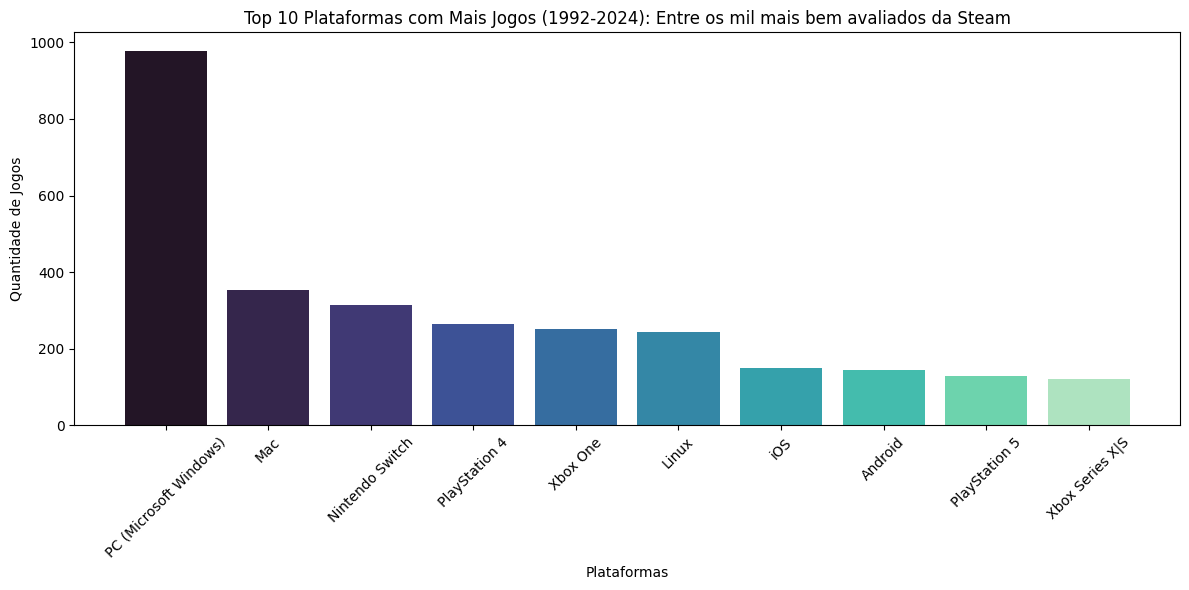

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV
df = pd.read_csv('games_data.csv')

# Converter o timestamp Unix para datetime e extrair o ano
df['release_year'] = pd.to_datetime(df['first_release_date'], unit='s').dt.year

# Lidar com as listas para transforma-las em string
df['platforms'] = df['platforms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('platforms')
df_exploded['platforms'] = df_exploded['platforms'].astype(str)

# Contar jogos por plataforma
frequencia = df_exploded.groupby('platforms').size().reset_index(name='count')

# 10 plataformas mais frequentes
top_platforms = frequencia.nlargest(10, 'count')

# plotando o grafico
plt.figure(figsize=(12, 6)) # deixar menos quadrado
colors = sns.color_palette("mako", len(top_platforms))  # paleta de cores mako 
plt.bar(top_platforms['platforms'], top_platforms['count'], color=colors)
plt.title('Top 10 Plataformas com Mais Jogos (1992-2024): Entre os mil mais bem avaliados da Steam')
plt.xlabel('Plataformas')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* O limite de dez plataformas que tiverem o indice de presença mais alto se deve a uma visualização melhor. 
* O gráfico indica que os jogos de PC foram dominantes durante todo o período, o que faz sentido, haja vista que os jogos do dataset recolhido são jogos para Steam que é uma distribuidora de jogos para computador. Portanto, em geral, os jogos serão disponíveis para computador, o que enviesa o gráfico. 
* É importante lembrar que os jogos mobile são apenas jogos que são lançados para mobile e também PC, em dados brutos a produção de jogos mobile é exponencialmente maior que a produção de jogos lançados para computador. 
* Além disso todos os gráficos cortam o viés de serem o top 1000 jogos mais bem avaliados da Steam.

### As dez plataformas que mais lançaram jogos por ano (3.1.2)

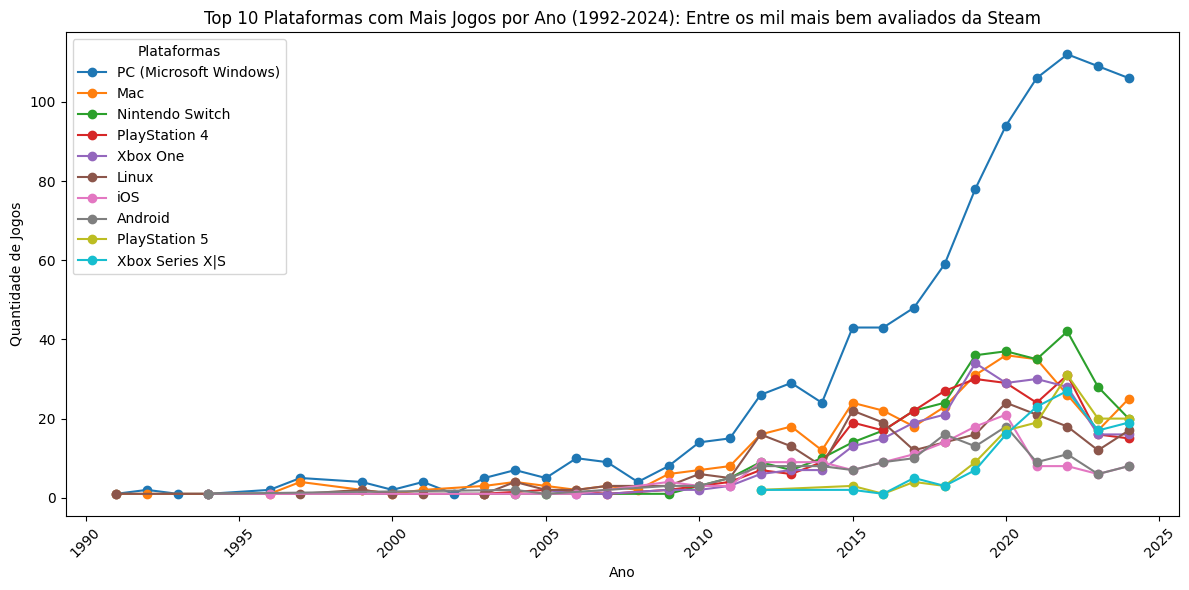

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

# Ano
df['release_year'] = pd.to_datetime(df['first_release_date'], unit='s').dt.year

# trabalhar com listas de plataforma
df['platforms'] = df['platforms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('platforms')
df_exploded['platforms'] = df_exploded['platforms'].astype(str)

# Contar a quantidade de jogos por ano e plataforma
frequencia = df_exploded.groupby(['release_year', 'platforms']).size().reset_index(name='count')

# Filtrar as 10 plataformas mais frequentes em todos os anos (deixar visivelmente melhor)
top_platforms = frequencia.groupby('platforms')['count'].sum().nlargest(10).index
frequencia_top = frequencia[frequencia['platforms'].isin(top_platforms)]

# plotar grafico
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    plt_data = frequencia_top[frequencia_top['platforms'] == platform]
    plt.plot(plt_data['release_year'], plt_data['count'], marker='o', label=platform)

plt.title('Top 10 Plataformas com Mais Jogos por Ano (1992-2024): Entre os mil mais bem avaliados da Steam')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.legend(title='Plataformas')
plt.tight_layout()
plt.show()


* O limite de dez plataformas que tiverem o indice de presença mais alto se deve a uma visualização melhor. 
* Entre as outras plataformas fora PC, Mac desponta em segundo lugar nos anos ao longo dos anos, mas sendo superado pelo Nintendo Switch nos anos recentes. 
* Já Playstation e Xbox compatilham lugares próximos, sendo os da nova geração menos presentes. O que faz sentido em vista a recepção dos consoles da nona geração (PS5, Xbox Series S|X) em frente os da oitava geração; os jogos se tornam cada vez mais caros no desenvolvimento.
* Lembrando que o gráfico avalia a quantidade de jogos lançados e não vendas, portanto faz sentido pois é relativamente mais simples lançar um jogo para computador do que para console. E jogos do Nintendo Switch, pode-se argumentar que são menos trabalhosos até pela capacidade técnica do console. 
* Outro ponto interessante é a presença de iOS e Android entre os jogos que são lançados para o computador, os quais apresentavam um crescimento constante de 2010 até 2020 - lembrando que antes de 2010 não era tão comum esses jogos serem lançados para PC e mobile (iOS lançou em 2006 e Android em 2008) - estas não representam um crescimento constante após 2020. Enquanto outras plataformas despontaram em 2020, por conta da pandemia do Covid-19, mas apresentando queda logo após o período quando a legislação começou a relaxar e as pessoas voltaram a sair de casa.
* O Nintendo Switch está em fim de ciclo (lançado em 2017) já com 7 anos, e o novo console da nintendo foi anunciado (Nintendo Switch 2) em que deve fazer sua estreia em 2025, portanto concentrando o desenvolvimento de novos jogos para o novo dispositivo. O que justifica a queda na produção após o ano de 2022. Em 2022 o console já tinha 5 anos de existência em um mercado que o tempo médio da geração era de 6 anos - O Switch superou essa marca resistindo sete anos (2024) e só será lançado no oitavo ano de existência do antigo console.

## Correlação Avaliativa (3.2)
### Uma boa avaliação se relaciona com o total de reviews? (3.2.1)


In [97]:
import seaborn as sns
import pandas as pd


# Leitura do CSV
df = pd.read_csv('games_data.csv')

# Remover vírgulas dos números e o símbolo de porcentagem, convertendo para float
df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float)

# Converter 'total reviews' para string, remover vírgulas, e converter para float
df['total reviews'] = df['total reviews'].astype(str).str.replace(',', '').astype(float)

# Calcular a correlação entre 'total reviews' e 'rating percentage'
correlacao = df['total reviews'].corr(df['rating percentage'])

print(correlacao)




0.007220126054406023


O valor da correlação 0.00720.0072 indica uma correlação muito fraca, quase inexistente, entre as colunas 'total reviews' e 'rating percentage'. Isso significa que, com base nos dados, não há uma relação linear significativa entre o número total de reviews e a porcentagem de avaliação.

### Matriz de Correlação (3.2.2)

Correlação: 0.007220126054406023


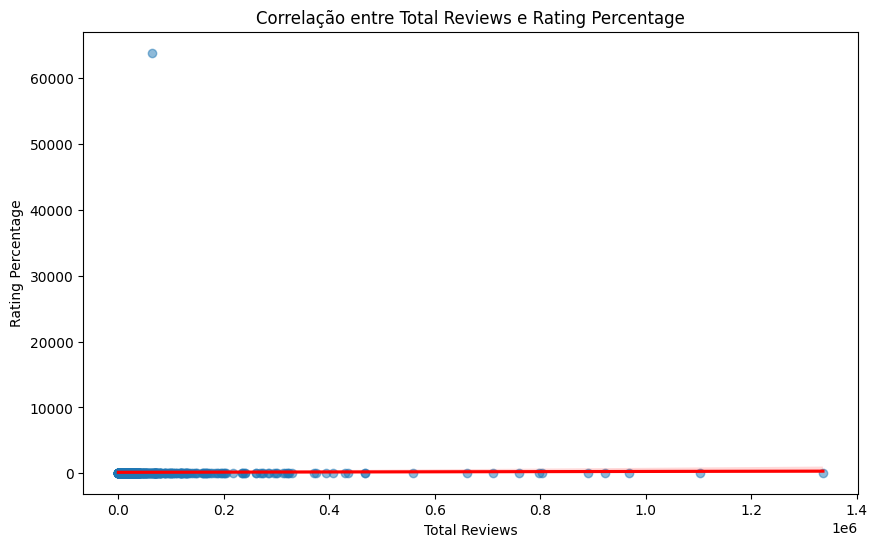

In [98]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Leitura do CSV
df = pd.read_csv('games_data.csv')

# Remover vírgulas dos números e o símbolo de porcentagem, convertendo para float
df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float)

# Converter 'total reviews' para string, remover vírgulas, e converter para float
df['total reviews'] = df['total reviews'].astype(str).str.replace(',', '').astype(float)

# Calcular a correlação entre 'total reviews' e 'rating percentage'
correlacao = df['total reviews'].corr(df['rating percentage'])
print(f'Correlação: {correlacao}')

# Criar gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='total reviews', y='rating percentage', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlação entre Total Reviews e Rating Percentage')
plt.xlabel('Total Reviews')
plt.ylabel('Rating Percentage')
plt.show()


Gráfico que demonstra a inexistência da correlação entre o número total de reviews e a porcentagem do quociente entre reviews positivas e negativas. Nesse sentido, é possível refletir que um jogo mais popular - com um número maior de avaliações - não presume uma avaliação melhor esses itens não estão correlacionados. Com a presença de um outlier que distorce o gráfico

#### Adereçando o outlier para melhorar o gráfico (3.2.2.a)

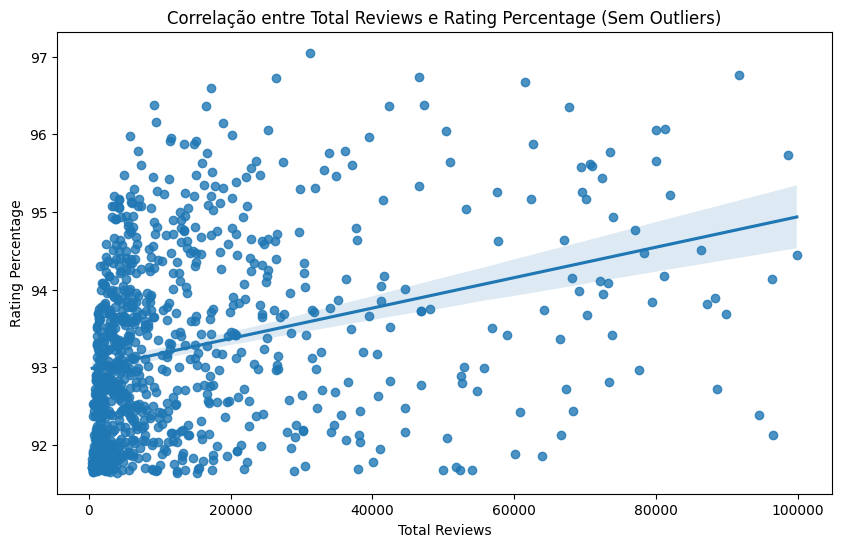

In [99]:
# Remover outliers com base em limites para 'total reviews' ou 'rating percentage'
df_filtered = df[(df['total reviews'] < 100000) & (df['rating percentage'] < 100)]

plt.figure(figsize=(10, 6))
sns.regplot(x='total reviews', y='rating percentage', data=df_filtered)
plt.title('Correlação entre Total Reviews e Rating Percentage (Sem Outliers)')
plt.xlabel('Total Reviews')
plt.ylabel('Rating Percentage')
plt.show()


O gráfico apresenta pontos quase que aleatórios e uma grande concentração em jogos com pequeno número de avaliações.

## Gêneros de Jogos (3.3)

### Gêneros de Jogos com Maior Sucesso entre o Público (3.3.1)

                          genres  public_rating_igdb
15                     Roguelike            8.700000
25                  Visual Nove;            8.500000
24     Turn-based strategy (TBS)            8.403448
8                        Pinball            8.400000
27  hack and slash or beat em up            8.017241
16            Role-playing (RPG)            8.005422
12                    QuizTrivia            7.980000
14      Real Time Strategy (RTS)            7.976923
9                       Platform            7.923596
17                       Shooter            7.907080
21                      Strategy            7.893798
22                      Tactical            7.878947
1                      Adventure            7.865835
3              Card & Board Game            7.830000
11                        Puzzle            7.766486
7                          Music            7.723810
0                         Action            7.710000
19                     Simulator            7.

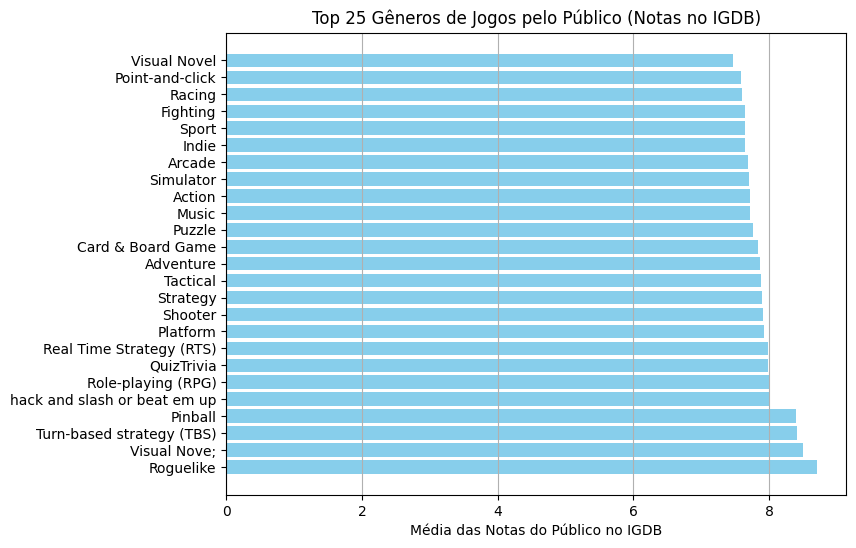

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float) / 100

df['public_rating_igdb'] = pd.to_numeric(df['public_rating_igdb'].str.replace(',', ''), errors='coerce')

df_exploded = df.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip('[]').str.replace("'", "").str.split(", ")

df_exploded = df_exploded.explode('genres')

average_ratings = df_exploded.groupby('genres')['public_rating_igdb'].mean().reset_index()

average_ratings = average_ratings.sort_values(by='public_rating_igdb', ascending=False)

top_10_genres = average_ratings.head(25)

print(top_10_genres)

plt.figure(figsize=(8, 6))
plt.barh(top_10_genres['genres'], top_10_genres['public_rating_igdb'], color='skyblue')
plt.xlabel('Média das Notas do Público no IGDB')
plt.title('Top 25 Gêneros de Jogos pelo Público (Notas no IGDB)')
plt.grid(axis='x')
plt.show()


O gênero de maior sucesso entre o público foi Roguelike e o de menor sucesso foi Visual Novel.

### Gênero de Jogos com Maior Sucesso entre a Crítica (3.3.2)

                          genres  aggregated_rating
15                     Roguelike           9.500000
22     Turn-based strategy (TBS)           8.782609
23                  Visual Nove;           8.700000
3              Card & Board Game           8.650000
21                      Tactical           8.600000
25  hack and slash or beat em up           8.528000
8                        Pinball           8.500000
7                          Music           8.469231
19                         Sport           8.466667
16            Role-playing (RPG)           8.370940
20                      Strategy           8.313580
1                      Adventure           8.266284
11                        Puzzle           8.225455
24                  Visual Novel           8.217391
6                          Indie           8.191139
13                        Racing           8.166667
9                       Platform           8.144286
17                       Shooter           8.142169
18          

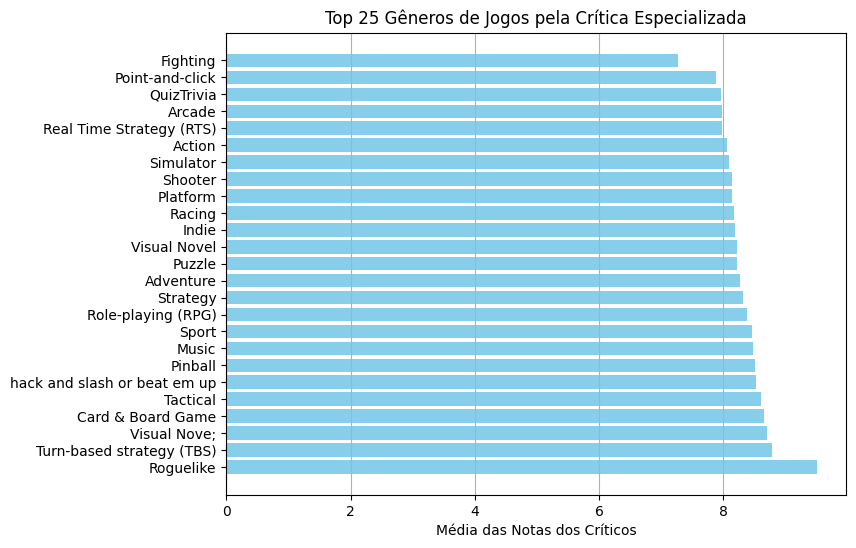

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float) / 100


df_exploded = df.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip('[]').str.replace("'", "").str.split(", ")

df_exploded = df_exploded.explode('genres')

df_exploded = df_exploded[(df_exploded['aggregated_rating'] >= 0) & (df_exploded['aggregated_rating'] <= 10)]

average_ratings = df_exploded.groupby('genres')['aggregated_rating'].mean().reset_index()

average_ratings = average_ratings.sort_values(by='aggregated_rating', ascending=False)

top_10_genres = average_ratings.head(25)

print(top_10_genres)

plt.figure(figsize=(8, 6))
plt.barh(top_10_genres['genres'], top_10_genres['aggregated_rating'], color='skyblue')
plt.xlabel('Média das Notas dos Críticos')
plt.title('Top 25 Gêneros de Jogos pela Crítica Especializada')
plt.grid(axis='x')
plt.show()


O gênero com maior sucesso entre a crítica foi Roguelike e o de menor sucesso foi o gênero de luta.

### Gêneros de Jogos: Crítica vs. Público (3.3.3)
---------------------------- Crítica ------------------------------------------------------ Público -------------------------------
| Rank |        genres                         | public_rating_igdb |        genres                         | aggregated_rating |
|------|---------------------------------------|---------------------|---------------------------------------|-------------------|
|  1   | Roguelike                             | 8.700000            | Roguelike                             | 9.500000          |
|  2   | Visual Nove;                          | 8.500000            | Turn-based strategy (TBS)            | 8.782609          |
|  3   | Turn-based strategy (TBS)            | 8.403448            | Visual Nove;                          | 8.700000          |
|  4   | Pinball                               | 8.400000            | Card & Board Game                     | 8.650000          |
|  5   | hack and slash or beat em up         | 8.017241            | Tactical                              | 8.600000          |
|  6   | Role-playing (RPG)                   | 8.005422            | hack and slash or beat em up         | 8.528000          |
|  7   | QuizTrivia                            | 7.980000            | Pinball                               | 8.500000          |
|  8   | Real Time Strategy (RTS)             | 7.976923            | Music                                 | 8.469231          |
|  9   | Platform                              | 7.923596            | Sport                                 | 8.466667          |
| 10   | Shooter                               | 7.907080            | Role-playing (RPG)                   | 8.370940          |
| 11   | Strategy                              | 7.893798            | Strategy                              | 8.313580          |
| 12   | Tactical                              | 7.878947            | Adventure                             | 8.266284          |
| 13   | Adventure                             | 7.865835            | Puzzle                                | 8.225455          |
| 14   | Card & Board Game                     | 7.830000            | Visual Novel                          | 8.217391          |
| 15   | Puzzle                                | 7.766486            | Indie                                 | 8.191139          |
| 16   | Music                                 | 7.723810            | Racing                                | 8.166667          |
| 17   | Action                                | 7.710000            | Platform                              | 8.144286          |
| 18   | Simulator                             | 7.709884            | Shooter                               | 8.142169          |
| 19   | Arcade                                | 7.693333            | Simulator                             | 8.088889          |
| 20   | Indie                                 | 7.648807            | Action                                | 8.050000          |
| 21   | Sport                                 | 7.646154            | Real Time Strategy (RTS)             | 7.980000          |
| 22   | Fighting                              | 7.637500            | Arcade                                | 7.970732          |
| 23   | Racing                                | 7.605556            | QuizTrivia                            | 7.966667          |
| 24   | Point-and-click                       | 7.584507            | Point-and-click                       | 7.874286          |
| 25   | Visual Novel                          | 7.465278            | Fighting                              | 7.266667          |


* Como podemos ver há algumas interseções entre os gêneros como o Roguelike que está em primeiro lugar em gênero nos dois públicos já outros como Visual Novel é um gênero mais apreciado pela crítica do que pelo público.
* Já os jogos de luta aparecem em colocações mais baixas nos dois rankings
* QuizTrivia é o gênero que mais varia colocações, ocupando a 23 na avaliação do público e uma 7a posição mais positiva pela crítica. Em segundo lugar vem Real Time Strategy, ocupando a 21a posição do pública e 8a posição pela crítica.

#### Tabela da variação de posições dos gêneros de jogos entre público e crítica (3.3.3.a)

| Gênero                         | Posição Crítica | Posição Público | Diferença de Posição |
|--------------------------------|----------------|------------------|----------------------|
| QuizTrivia                     | 7              | 23               | 16                   |
| Real Time Strategy (RTS)      | 8              | 21               | 13                   |
| Visual Novel                   | 3              | 14               | 11                   |
| Shooter                        | 10             | 18               | 8                    |
| Tactical                       | 5              | 12               | 7                    |
| Indie                          | 20             | 15               | 5                    |
| Role-playing (RPG)            | 6              | 10               | 4                    |
| Fighting                       | 22             | 25               | 3                    |
| Pinball                        | 4              | 7                | 3                    |
| Turn-based strategy (TBS)      | 2              | 3                | 1                    |


---

### Sistema de Score entre os jogos e suas avaliações (3.4)

Melhores Jogos e suas Pontuações Normalizadas:
AVICII Invector: 100.00
Trine: 73.94
ELDEN RING: 71.33
Baldur's Gate 3: 70.81
The Witcher 3: Wild Hunt: 70.27
Disco Elysium: 70.19
Persona 5 Royal: 69.81
Broforce: 69.61
Persona 4 Golden: 69.53
God of War: 69.34


C:\Users\Rod\AppData\Local\Temp\ipykernel_11024\2784227206.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='normalized_score', y='name', data=top_games, palette='Blues_r')


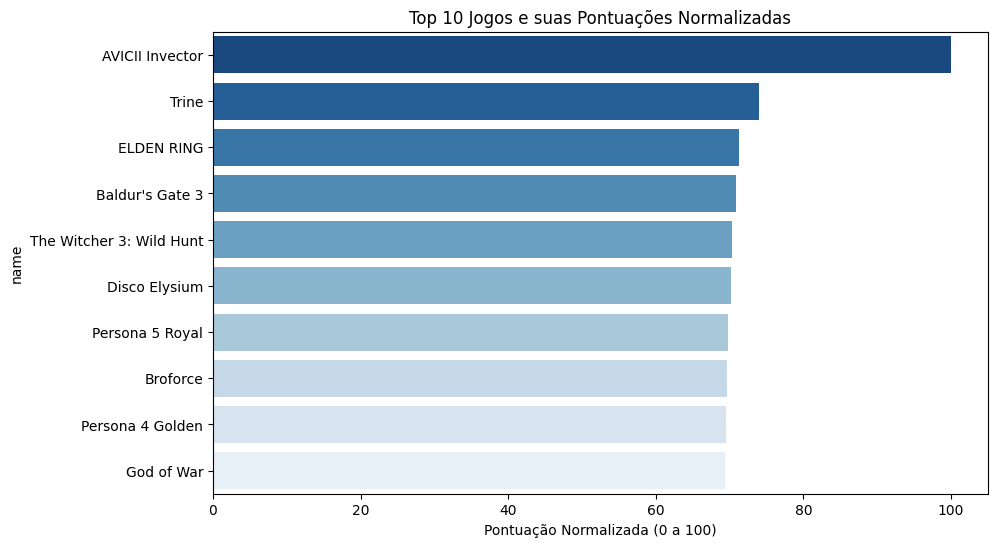

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('games_data.csv')

# Função para limpar e converter séries
def clean_and_convert(series):
    series = series.astype(str).replace('nan', '')
    series.replace('', np.nan, inplace=True)
    cleaned_series = series.str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    return cleaned_series.astype(float)

# Limpar os dados
df['positive ratings'] = clean_and_convert(df['positive ratings'])
df['negative ratings'] = clean_and_convert(df['negative ratings'])
df['total reviews'] = clean_and_convert(df['total reviews'])
df['aggregated_rating'] = clean_and_convert(df['aggregated_rating'])
df['aggregated_rating_count'] = clean_and_convert(df['aggregated_rating_count'])
df['public_rating_igdb'] = clean_and_convert(df['public_rating_igdb'])
df['public_rating_count'] = clean_and_convert(df['public_rating_count'])

# Calcular o quociente de avaliações positivas
df['positive_review_ratio'] = df['positive ratings'] / df['total reviews']

# Definição da fórmula do score
df['score'] = (
    (df['aggregated_rating'] * df['aggregated_rating_count']) +
    (df['public_rating_igdb'] * df['public_rating_count']) +
    (df['positive_review_ratio'] * 100)
) / (
    df['aggregated_rating_count'] + 
    df['public_rating_count'] + 
    100
)

# Normalizar a pontuação para ficar entre 0 e 100
min_score = df['score'].min()
max_score = df['score'].max()
df['normalized_score'] = ((df['score'] - min_score) / (max_score - min_score)) * 100

# Remover jogos com pontuação NaN
valid_scores = df[['name', 'normalized_score']].dropna()

# Classificação
top_games = valid_scores.sort_values(by='normalized_score', ascending=False).head(10)

print("Melhores Jogos e suas Pontuações Normalizadas:")
for index, row in top_games.iterrows():
    print(f"{row['name']}: {row['normalized_score']:.2f}")

# Plotar os melhores jogos usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='normalized_score', y='name', data=top_games, palette='Blues_r')
plt.xlabel('Pontuação Normalizada (0 a 100)')
plt.title('Top 10 Jogos e suas Pontuações Normalizadas')
plt.show()


O resultado é interessante porque o primeiro colocado é um jogo de ritmo de um artista da música, já em segundo é um jogo de plataforma já um pouco mais antigo (2009). Seguido de títulos mais modernos como Elden Ring, Baldur's Gate 3 e The Witcher. Observando esses títulos é possível observar realmente uma apreciação crítica e do público nesses títulos.

---